<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <a href="https://praktikum.yandex.ru/">     
           <img 
               src="https://yastatic.net/q/praktikum/v0.116.12-fix3-1580741332/static/apple-touch-icon.png" 
               style="width:50px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Яндекс.Практикум</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>Анализ бизнес-показателей<p>
    </h2></div>

<hr style="border: 1px solid #000;"> 

# Описание проекта<a id="beginning"></a>



### **Задача:** помочь маркетологам оптимизировать маркетинговые затраты сервиса Онлайн.Афиша.

#### В распоряжении есть данные от Онлайн.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Онлайн.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
#### Вы изучите:
как люди пользуются продуктом,
когда они начинают покупать,
сколько денег приносит каждый клиент
когда клиент окупается.

## Шаги выполнения проекта:

### [Шаг 1. Загрузите данные и подготовьте их к анализу](#task1)
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. 

### Шаг 2. Постройте отчёты и посчитайте метрики


#### [Продукт](#task_product)
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

#### [Продажи](#task_sales)
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

#### [Маркетинг](#task_marketing)
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

### [Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?](#task_3)
Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?



### Описание данных:<a name="0."></a>

[<font size="2">(к содержанию)</font>](#beginning)<br/>

#### Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь
#### Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа
#### Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

<a name="task1"></a>
### Шаг 1. Загрузите данные и подготовьте их к анализу
[<font size="2">(к содержанию)</font>](#beginning)<br/>

Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам: /datasets/visits_log.csv /datasets/orders_log.csv /datasets/costs.csv

In [1]:
# импортируем все нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st
import seaborn as sns
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


#обозначим заранее, что хотим видеть все столбцы в датафреймах
pd.set_option('display.max_columns', 50)

In [2]:
#читаем и выводим файл
visits = pd.read_csv('business_rates_data_visits', index_col=0)

visits

Device               End Ts  Source Id             Start Ts  \
0         touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1       desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2         touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3       desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4       desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
...         ...                  ...        ...                  ...   
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         Uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359400 rows x 5 columns]

In [3]:
#присвоим столбцам названия в нижнем регистре и без пробелов

visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')

In [4]:
#столбцы переименовались корректно
visits.head(5)

device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [5]:
#читаем и выводим файл

costs = pd.read_csv('business_rates_data_costs', index_col=0)
costs

source_id          dt  costs
0             1  2017-06-01  75.20
1             1  2017-06-02  62.25
2             1  2017-06-03  36.53
3             1  2017-06-04  55.00
4             1  2017-06-05  57.08
...         ...         ...    ...
2537         10  2018-05-27   9.92
2538         10  2018-05-28  21.26
2539         10  2018-05-29  11.32
2540         10  2018-05-30  33.15
2541         10  2018-05-31  17.60

[2542 rows x 3 columns]

In [6]:
#проверим типы данных и пропуски
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 16.5+ MB


In [7]:
# столбец end_ts приведем к временному формату
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [8]:
# столбец start_ts приведем к временному формату
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


In [10]:
#читаем и выводим файл

orders = pd.read_csv('business_rates_data_orders', index_col=0)
orders


Buy Ts  Revenue                   Uid
0      2017-06-01 00:10:00    17.00  10329302124590727494
1      2017-06-01 00:25:00     0.55  11627257723692907447
2      2017-06-01 00:27:00     0.37  17903680561304213844
3      2017-06-01 00:29:00     0.55  16109239769442553005
4      2017-06-01 07:58:00     0.37  14200605875248379450
...                    ...      ...                   ...
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

In [11]:
#присвоим столбцам названия в нижнем регистре и без пробелов

visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')

In [12]:
#столбцы переименовались корректно 
orders.head(5)

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [13]:
#присвоим столбцам названия в нижнем регистре и без пробелов

orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')

In [14]:
#проверим типы данных и пропуски
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


In [15]:
# столбец buy_ts приведем к временному формату
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [16]:
#тип изменился на временной, пропусков нет
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


In [17]:
#проверим типы данных и пропуски
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 79.4+ KB


In [18]:
# столбец dt приведем к временному формату
costs['dt'] = pd.to_datetime(costs['dt'])

In [19]:
#тип изменился на временной, пропусков нет
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 79.4 KB


### Вывод: 
Во всех трех файлах пропусков нет, где есть временные столбцы - привели их к формату времени, названия столбцов привели к нижним регистрам и убрали из них пробелы.

[<font size="2">(к содержанию)</font>](#beginning)<br/>

## Шаг 2. Постройте отчёты и посчитайте метрики

## Задача - Продукт:<a id="task_product"></a>
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

In [20]:
#добавим в таблицу visits столбцы с годом, месяцем, неделей и полной датой начала пользовательской сессии
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.to_period('M')
visits['session_week']  = visits['start_ts'].dt.to_period('W')
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year session_month           session_week  \
0  16879256277535980062          2017       2017-12  2017-12-18/2017-12-24   
1    104060357244891740          2018       2018-02  2018-02-19/2018-02-25   
2   7459035603376831527          2017       2017-07  2017-06-26/2017-07-02   
3  16174680259334210214          2018       2018-05  2018-05-14/2018-05-20   
4   9969694820036681168          2017       2017-12  2017-12-25/2017-12-31   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27

In [21]:
# сгруппируем данные по нужному столбцу и найдем среднее dau, wau, mau
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [22]:
#  в среднем 907 человек пользуются сайтом Яндекс.Афиша в день
int(dau_total) 

907

In [23]:
#  в среднем 5701 человек пользуются сайтом Яндекс.Афиша в неделю
int(wau_total)

5716

In [24]:
#  в среднем 23228 человек пользуются сайтом Яндекс.Афиша в месяц
int(mau_total)

23228

In [25]:
#создадим датасет для отрисовки графика для mau
mau_total_plot = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
mau_total_plot.head()

session_year session_month    uid
0          2017       2017-06  13259
1          2017       2017-07  14183
2          2017       2017-08  11631
3          2017       2017-09  18975
4          2017       2017-10  29692

In [26]:
# визуализируем mau
mau_total_plot['session_month'] = mau_total_plot['session_month'].astype('str')
fig = px.bar(mau_total_plot, x='session_month', y='uid', title='График количества пользователей по месяцам')
fig.update_xaxes(nticks=20)
fig.update_layout(xaxis_title='Месяц', yaxis_title='Количество посетителей')
fig.show()

<hr style="border: 1px solid #000;"> 

In [27]:
#рассчитаем сколько в среднем сессий на одного пользователья в день приходлится
sessions_per_user = visits.groupby(['session_year', 'session_month', 'session_week', 'session_date' ]).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

n_sessions  \
session_year session_month session_week          session_date               
2017         2017-06       2017-05-29/2017-06-04 2017-06-01           664   
                                                 2017-06-02           658   
                                                 2017-06-03           477   
                                                 2017-06-04           510   
                           2017-06-05/2017-06-11 2017-06-05           893   
...                                                                   ...   
2018         2018-05       2018-05-21/2018-05-27 2018-05-27           672   
                           2018-05-28/2018-06-03 2018-05-28          1156   
                                                 2018-05-29          1035   
                                                 2018-05-30          1410   
                                                 2018-05-31          2256   

                                                               n_users  \
session_year session_month session_week          session_date            
2017         2017-06       2017-05-29/2017-06-04 2017-06-01        605   
                                                 2017-06-02        608   
                                                 2017-06-03        445   
                                                 2017-06-04        476   
                           2017-06-05/2017-06-11 2017-06-05        820   
...                                                                ...   
2018         2018-05       2018-05-21/2018-05-27 2018-05-27        620   
                           2018-05-28/2018-06-03 2018-05-28       1039   
                                                 2018-05-29        948   
                                                 2018-05-30       1289   
                                                 2018-05-31       1997   

                                                               sess_per_user  
session_year session_month session_week          session_date                 
2017         2017-06       2017-05-29/2017-06-04 2017-06-01         1.097521  
                                                 2017-06-02         1.082237  
                                                 2017-06-03         1.071910  
                                                 2017-06-04         1.071429  
                           2017-06-05/2017-06-11 2017-06-05         1.089024  
...                                                                      ...  
2018         2018-05       2018-05-21/2018-05-27 2018-05-27         1.083871  
                           2018-05-28/2018-06-03 2018-05-28         1.112608  
                                                 2018-05-29         1.091772  
                                                 2018-05-30         1.093871  
                                                 2018-05-31         1.129695  

[364 rows x 3 columns]

In [28]:
#посчитаем сколько в среднем сессий приходится на 1 пользователя в неделю.
sess_mean_per_user = sessions_per_user['sess_per_user'].mean()
print("В день пользователь проводит в среднем {:.3} сессию.".format (sess_mean_per_user)) 

В день пользователь проводит в среднем 1.08 сессию.


In [29]:
#добавим столбец с расчетом длительности пользовательской сессии в секундах
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

In [30]:
visits.head(5)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year session_month           session_week  \
0  16879256277535980062          2017       2017-12  2017-12-18/2017-12-24   
1    104060357244891740          2018       2018-02  2018-02-19/2018-02-25   
2   7459035603376831527          2017       2017-07  2017-06-26/2017-07-02   
3  16174680259334210214          2018       2018-05  2018-05-14/2018-05-20   
4   9969694820036681168          2017       2017-12  2017-12-25/2017-12-31   

  session_date  session_duration_sec  
0   2017-12-20                1080.0  
1   2018-02-19                1680.0  
2   2017-07-01                   0.0  
3   2018-05-20                1440.0  
4   2017-12-27                   0.0

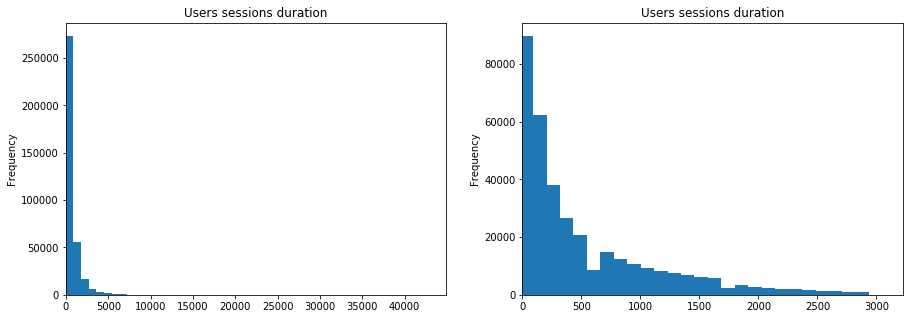

In [31]:
#распределение не похоже на нормальное, лучше искать моду, хотя среднее тоже посмотрим
fig, axes = plt.subplots(1,2, figsize=(15,5))

# 1ый график
visits['session_duration_sec'].plot(kind='hist', bins=50, ax=axes[0], xlim=(0, None),
                                    title='Users sessions duration')

# 2ой, отфильтрованный график
(visits
     .query('session_duration_sec < 3000')['session_duration_sec']
     .plot(kind='hist', bins=50, ax=axes[1], xlim=(0, None), title='Users sessions duration')
)


<hr style="border: 1px solid #000;"> 

In [32]:
sess_dur_per_user = visits['session_duration_sec'].mean()/60
"Среднее значение пользовательской сессии - {:.1f} минут.".format (sess_dur_per_user)

'Среднее значение пользовательской сессии - 10.7 минут.'

In [33]:
# Самая часто встречающаяся длительность пользовательской сессии - 60 секунд ( 1 минута - маловато)
visits['session_duration_sec'].mode()

0    60.0
dtype: float64

In [34]:
#сформируем срез для расчета retention rate
users_visits = visits[['uid', 'start_ts']]

In [35]:
users_visits.head(5)

uid            start_ts
0  16879256277535980062 2017-12-20 17:20:00
1    104060357244891740 2018-02-19 16:53:00
2   7459035603376831527 2017-07-01 01:54:00
3  16174680259334210214 2018-05-20 10:59:00
4   9969694820036681168 2017-12-27 14:06:00

In [36]:
#добавим для каждого uid дату первой активности на сайте
first_activity_date = users_visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_start_ts'
users_visits = users_visits.join(first_activity_date,on='uid')

In [37]:
users_visits.head(5)

uid            start_ts      first_start_ts
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:20:00
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 16:53:00
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00
3  16174680259334210214 2018-05-20 10:59:00 2018-03-09 20:05:00
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00

In [38]:
# расчитаем первые дни (понедельники) недель начала активностей:
users_visits['visit_month'] = users_visits['start_ts'].astype('datetime64[M]')
users_visits['first_visit_month'] = users_visits['first_start_ts'].astype('datetime64[M]')

In [39]:
users_visits

uid            start_ts      first_start_ts  \
0       16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:20:00   
1         104060357244891740 2018-02-19 16:53:00 2018-02-19 16:53:00   
2        7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00   
3       16174680259334210214 2018-05-20 10:59:00 2018-03-09 20:05:00   
4        9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00   
...                      ...                 ...                 ...   
359395  18363291481961487539 2017-07-29 19:07:00 2017-07-29 19:07:00   
359396  18370831553019119586 2018-01-25 17:38:00 2018-01-25 17:38:00   
359397  18387297585500748294 2018-03-03 10:12:00 2018-03-03 10:12:00   
359398  18388616944624776485 2017-11-02 10:12:00 2017-11-02 10:12:00   
359399  18396128934054549559 2017-09-10 13:13:00 2017-09-10 13:13:00   

       visit_month first_visit_month  
0       2017-12-01        2017-12-01  
1       2018-02-01        2018-02-01  
2       2017-07-01        2017-07-01  
3       2018-05-01        2018-03-01  
4       2017-12-01        2017-12-01  
...            ...               ...  
359395  2017-07-01        2017-07-01  
359396  2018-01-01        2018-01-01  
359397  2018-03-01        2018-03-01  
359398  2017-11-01        2017-11-01  
359399  2017-09-01        2017-09-01  

[359400 rows x 5 columns]

In [40]:
#добавим столбец с номером жизненного цикла пользователя из каждой когорты (сначала вычтем дату последней активности из 
# даты первой, которые предварительно отсортированы по 1 числам месяца), затем получившийся отрезок времени разделим на 1 месяц
# и в итоге получим число прошедших месяцев, относительно первого захода на сайт для каждого нового пользовательского захода
users_visits['cohort_lifetime'] = users_visits['visit_month'] - users_visits['first_visit_month']
users_visits['cohort_lifetime'] = users_visits['cohort_lifetime'] / np.timedelta64(1,'M')
users_visits['cohort_lifetime'] = users_visits['cohort_lifetime'].round().astype(int)

In [41]:
#сгруппируем пользователей в когорты и посчитаем для каждой когорты количество активных пользователей 
#на определённый «месяц жизни»:
cohorts = users_visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [42]:
cohorts

first_visit_month  cohort_lifetime    uid
0         2017-06-01                0  13259
1         2017-06-01                1   1043
2         2017-06-01                2    713
3         2017-06-01                3    814
4         2017-06-01                4    909
..               ...              ...    ...
73        2018-03-01                1    861
74        2018-03-01                2    557
75        2018-04-01                0  15709
76        2018-04-01                1    760
77        2018-05-01                0  15273

[78 rows x 3 columns]

In [43]:
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц жизни ("месяц рождения") когорты:
inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
inital_users_count

first_visit_month    uid
0         2017-06-01  13259
12        2017-07-01  13140
23        2017-08-01  10181
33        2017-09-01  16704
42        2017-10-01  25977
50        2017-11-01  27248
57        2017-12-01  25268
63        2018-01-01  22624
68        2018-02-01  22197
72        2018-03-01  20589
75        2018-04-01  15709
77        2018-05-01  15273

In [44]:
#Переименуем столбец user_id в cohort_users_total. Параметру columns передадим словарь, где ключ — старое название столбца,
# а значение — новое:
inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users_total'})

In [45]:
#периеменование удалось
inital_users_count

first_visit_month  cohort_users_total
0         2017-06-01               13259
12        2017-07-01               13140
23        2017-08-01               10181
33        2017-09-01               16704
42        2017-10-01               25977
50        2017-11-01               27248
57        2017-12-01               25268
63        2018-01-01               22624
68        2018-02-01               22197
72        2018-03-01               20589
75        2018-04-01               15709
77        2018-05-01               15273

In [46]:
#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(inital_users_count,on='first_visit_month')

In [47]:
#слияние произошло и нужный толбец появился
cohorts

first_visit_month  cohort_lifetime    uid  cohort_users_total
0         2017-06-01                0  13259               13259
1         2017-06-01                1   1043               13259
2         2017-06-01                2    713               13259
3         2017-06-01                3    814               13259
4         2017-06-01                4    909               13259
..               ...              ...    ...                 ...
73        2018-03-01                1    861               20589
74        2018-03-01                2    557               20589
75        2018-04-01                0  15709               15709
76        2018-04-01                1    760               15709
77        2018-05-01                0  15273               15273

[78 rows x 4 columns]

In [48]:
# рассчитаем Retention Rate. Разделим количество активных пользователей в каждом из месяцов
# на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users_total']

In [49]:
#сформируем сводную таблицу по retention rate по кагортам и срокам жизни когорт
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

In [50]:
retention_pivot

cohort_lifetime     0         1         2         3         4         5   \
first_visit_month                                                          
2017-06-01         1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07-01         1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01         1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01         1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10-01         1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11-01         1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12-01         1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01-01         1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018-02-01         1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018-03-01         1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04-01         1.0  0.048380       NaN       NaN       NaN       NaN   
2018-05-01         1.0       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime          6         7         8         9         10        11  
first_visit_month                                                              
2017-06-01         0.061015  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01         0.045358  0.045738  0.038813  0.028615  0.027473       NaN  
2017-08-01         0.036342  0.039485  0.027895  0.026029       NaN       NaN  
2017-09-01         0.035860  0.024186  0.022809       NaN       NaN       NaN  
2017-10-01         0.021365  0.020364       NaN       NaN       NaN       NaN  
2017-11-01         0.021800       NaN       NaN       NaN       NaN       NaN  
2017-12-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01              NaN       NaN       NaN       NaN       NaN       NaN

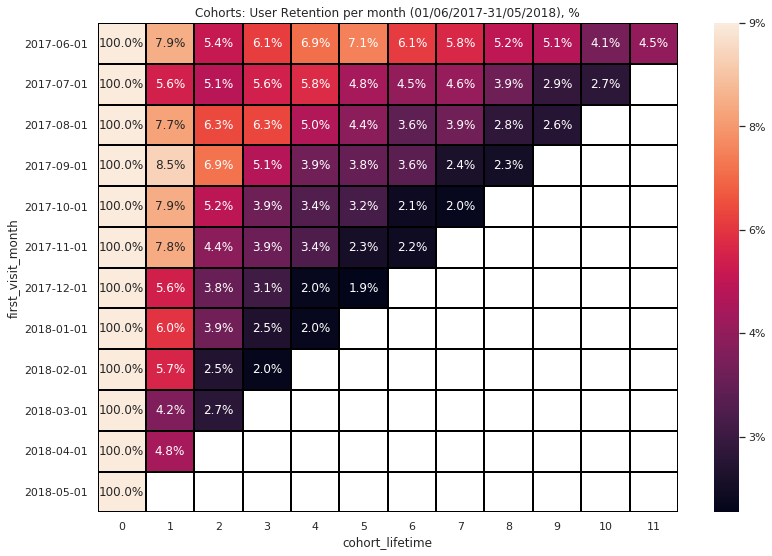

In [51]:
# визуализируем retention rate по когортам через график heat map

#импортируем FuncFormatter для форматирования осей (избавляемся от лишних нулей по оси оу)
from matplotlib.ticker import FuncFormatter

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention per month (01/06/2017-31/05/2018), %')
fmt = lambda x,pos: '{:.0%}'.format(x)
heatmap = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black', vmax=0.09,
            cbar_kws={'format': FuncFormatter(fmt)})
y_labels = heatmap.set_yticklabels(retention_pivot.index.date)  # подписи по Oy без нулей

<hr style="border: 1px solid #000;"> 

   Исходя из данных heatmap можно сделать следующий вывод: клиенты возвращаются крайне редко, более 90% пользователей не возвращаются к сайту после первого месяца использования. В апреле 2018 процент возврата был еще ниже, чем в среднем во всех предудущих месяцах, в мае 2018 ситуация практически не изменилась, по сравнению с апрелем. Самой "верной" когортой можно считать от июня 2017, они держат процент возврата к услугам сайта выше, чем остальные на протяжении всего периода отслеживания. ОТ когорты к когорте процент возврата все ниже. Пользователей что-то не устраивает, нужно выяснять причину как оживить интерес и стимулировать людей вновь возвращаться на сайт Афишы. 'Усредненное значение retantion rate за период 6 месяцев - 5.2 %'

In [52]:
#позьмем для рассчета среднего retention rate период полгода, как наиболее оптимальный и, соответственно, только те когорты, которые прожили уже 
#полные 6 месяцев

retention_pivot_gr = retention_pivot.reset_index()
retention_pivot_gr_6mnth = retention_pivot_gr.iloc[:6, 2:8]
retention_pivot_gr_6mnth

cohort_lifetime         1         2         3         4         5         6
0                0.078664  0.053775  0.061392  0.068557  0.071423  0.061015
1                0.056088  0.051294  0.056164  0.058219  0.048174  0.045358
2                0.076908  0.062862  0.062764  0.050093  0.044004  0.036342
3                0.085489  0.069205  0.050706  0.039392  0.037835  0.035860
4                0.078608  0.052239  0.038958  0.034261  0.032221  0.021365
5                0.078281  0.044113  0.038682  0.033727  0.023415  0.021800

In [53]:
mnth_6_retention = retention_pivot_gr_6mnth.mean().mean()*100
# UPD:
"Усредненное значение retantion rate за период 6 месяцев - {:.1f} %".format (mnth_6_retention)

'Усредненное значение retantion rate за период 6 месяцев - 5.2 %'

### Вывод по задаче "Продукт":

**Сколько людей пользуются в день, неделю, месяц?** - в среднем 907 человек пользуются сайтом Яндекс.Афиша в день, 5701 человек  в неделю, 23228 человек в месяц.

**Сколько сессий в день?** - В день пользователь проводит в среднем 1.08 сессию.

**Сколько длится одна сессия?** - Самая часто встречающаяся длительность пользовательской сессии - 60 секунд ( 1 минута - маловато)

**Как часто люди возвращаются?** - Исходя из данных heatmap можно сделать следующий вывод: клиенты возвращаются крайне редко, более 90% пользователей не возвращаются к сайту после первого месяца использования. В апреле 2018 процент возврата был еще ниже, чем в среднем во всех предудущих месяцах, в мае 2018 ситуация практически не изменилась, по сравнению с апрелем. Самой "верной" когортой можно считать от июня 2017, они держат процент возврата к услугам сайта выше, чем остальные на протяжении всего периода отслеживания. ОТ когорты к когорте процент возврата все ниже. Пользователей что-то не устраивает, нужно выяснять причину как оживить интерес и стимулировать людей вновь возвращаться на сайт Афишы.

[<font size="2">(к содержанию)</font>](#beginning)<br/>

## Задача - Продажи:<a id="task_sales"></a>

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)
    

In [54]:
# вычислим дату самой первой покупки пользователей сайта
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min() 
print (first_order_date_by_customers.head())

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]


In [55]:
#переименуем столбец
first_order_date_by_customers.name = 'first_order_date'

In [56]:
# уберем индексацию, для того чтобы далее объединить этот датафрейм и визиты для расчета времени до покупки:
first_order_date_by_customers_list = first_order_date_by_customers.reset_index()
first_order_date_by_customers_list

uid    first_order_date
0           313578113262317 2018-01-03 21:51:00
1          1575281904278712 2017-06-03 10:13:00
2          2429014661409475 2017-10-11 18:33:00
3          2464366381792757 2018-01-28 15:54:00
4          2551852515556206 2017-11-24 10:14:00
...                     ...                 ...
36518  18445147675727495770 2017-11-24 09:03:00
36519  18445407535914413204 2017-09-22 23:55:00
36520  18445601152732270159 2018-03-26 22:54:00
36521  18446156210226471712 2018-02-18 19:34:00
36522  18446167067214817906 2017-10-17 10:16:00

[36523 rows x 2 columns]

In [57]:
# отфильтруем датафрейм с визитами по тем юзерам, которые совершали заказ
visits_with_orders = visits[visits['uid'].isin(orders['uid']) == True]

In [58]:
visits_with_orders

device              end_ts  source_id            start_ts  \
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
12      desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
15        touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
25      desktop 2017-12-05 10:28:00          4 2017-12-05 10:21:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid  session_year session_month  \
3       16174680259334210214          2018       2018-05   
5       16007536194108375387          2017       2017-09   
12       8056418121947262981          2018       2018-02   
15      18188358787673499603          2018       2018-02   
25       2307401184189569202          2017       2017-12   
...                      ...           ...           ...   
359395  18363291481961487539          2017       2017-07   
359396  18370831553019119586          2018       2018-01   
359397  18387297585500748294          2018       2018-03   
359398  18388616944624776485          2017       2017-11   
359399  18396128934054549559          2017       2017-09   

                 session_week session_date  session_duration_sec  
3       2018-05-14/2018-05-20   2018-05-20                1440.0  
5       2017-08-28/2017-09-03   2017-09-03                  60.0  
12      2018-02-05/2018-02-11   2018-02-06                 300.0  
15      2018-02-12/2018-02-18   2018-02-12                3960.0  
25      2017-12-04/2017-12-10   2017-12-05                 420.0  
...                       ...          ...                   ...  
359395  2017-07-24/2017-07-30   2017-07-29                  19.0  
359396  2018-01-22/2018-01-28   2018-01-25                  19.0  
359397  2018-02-26/2018-03-04   2018-03-03                  19.0  
359398  2017-10-30/2017-11-05   2017-11-02                  19.0  
359399  2017-09-04/2017-09-10   2017-09-10                  19.0  

[97394 rows x 10 columns]

In [59]:
first_activity_date_with_order_pivot = visits_with_orders.pivot_table(index='uid', values='start_ts', aggfunc='min')
first_activity_date_with_order_pivot

start_ts
uid                                     
313578113262317      2017-09-18 22:49:00
1575281904278712     2017-06-03 10:13:00
2429014661409475     2017-10-11 17:14:00
2464366381792757     2018-01-27 20:10:00
2551852515556206     2017-11-24 10:14:00
...                                  ...
18445147675727495770 2017-08-20 13:30:00
18445407535914413204 2017-09-22 23:48:00
18445601152732270159 2017-08-07 11:51:00
18446156210226471712 2017-11-07 10:01:00
18446167067214817906 2017-10-17 10:05:00

[36523 rows x 1 columns]

In [60]:
#объединим датафрейм со временем первых визитов и first_order_date_by_customers для расчета времени до покупки
first_visits_uid_first_order = first_order_date_by_customers_list.merge(first_activity_date_with_order_pivot,on='uid')


In [61]:
first_visits_uid_first_order.head(5)

uid    first_order_date            start_ts
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00

In [62]:
#вычтем из времени первой покупки время первого захода на сайт, так мы поймем сколько времени клиент принимает решение:
first_visits_uid_first_order['time_before_order'] = first_visits_uid_first_order['first_order_date']\
- first_visits_uid_first_order['start_ts']


In [63]:
#добавим столбец с расчетом длительности пользовательской сессии в секундах
#вычтем из времени первой покупки время первого захода на сайт, так мы поймем сколько времени клиент принимает решение:
first_visits_uid_first_order['time_before_order_sec'] = (first_visits_uid_first_order['first_order_date'] - first_visits_uid_first_order['start_ts']).dt.total_seconds()


In [64]:
#столбец добавился
first_visits_uid_first_order

uid    first_order_date            start_ts  \
0           313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00   
1          1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
2          2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00   
3          2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00   
4          2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   
...                     ...                 ...                 ...   
36518  18445147675727495770 2017-11-24 09:03:00 2017-08-20 13:30:00   
36519  18445407535914413204 2017-09-22 23:55:00 2017-09-22 23:48:00   
36520  18445601152732270159 2018-03-26 22:54:00 2017-08-07 11:51:00   
36521  18446156210226471712 2018-02-18 19:34:00 2017-11-07 10:01:00   
36522  18446167067214817906 2017-10-17 10:16:00 2017-10-17 10:05:00   

      time_before_order  time_before_order_sec  
0     106 days 23:02:00              9241320.0  
1       0 days 00:00:00                    0.0  
2       0 days 01:19:00                 4740.0  
3       0 days 19:44:00                71040.0  
4       0 days 00:00:00                    0.0  
...                 ...                    ...  
36518  95 days 19:33:00              8278380.0  
36519   0 days 00:07:00                  420.0  
36520 231 days 11:03:00             19998180.0  
36521 103 days 09:33:00              8933580.0  
36522   0 days 00:11:00                  660.0  

[36523 rows x 5 columns]

In [65]:
#присутствует много аномально длительных принятий решений о покупке (выбросов), посмотрим далее данные без них

fig = px.histogram(first_visits_uid_first_order, x='time_before_order')
fig.update_layout(title='Time before first order in sec after first session, all durations')
fig.show()

In [66]:
#ящик с усами подтверждает, что есть много выбросов в данных, сильно отличающихся от других в большую сторону
fig = px.box(first_visits_uid_first_order, y="time_before_order_sec")
fig.update_layout(title='Time before first order in sec after first session')
fig.show()

In [67]:
#проанализируем тех, кто совершает покупку в течение первого часа после захода на сайт, сколько им требуется времени на покупку
order_time_less_one_hour = first_visits_uid_first_order[first_visits_uid_first_order['time_before_order_sec'] < 3600]

fig = px.box(order_time_less_one_hour, y="time_before_order_sec")
fig.update_layout(title='Time before first order in sec after first session, less 1 hour')
fig.show()

In [68]:
# судя по количеству строк - заказов в течение часа после захода около 62% от всех, поэтому есть смысл посмотреть из детальнее
order_time_less_one_hour

uid    first_order_date            start_ts  \
1          1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
4          2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   
5          3077748354309989 2018-03-03 12:33:00 2018-03-03 12:08:00   
7          3753586865891862 2018-03-03 13:50:00 2018-03-03 13:47:00   
8          4808417689019433 2018-01-09 23:32:00 2018-01-09 23:10:00   
...                     ...                 ...                 ...   
36513  18438888612344691875 2017-08-24 23:42:00 2017-08-24 23:15:00   
36514  18439162270906870763 2017-08-10 21:40:00 2017-08-10 21:37:00   
36517  18442290965339407211 2018-02-05 19:39:00 2018-02-05 19:35:00   
36519  18445407535914413204 2017-09-22 23:55:00 2017-09-22 23:48:00   
36522  18446167067214817906 2017-10-17 10:16:00 2017-10-17 10:05:00   

      time_before_order  time_before_order_sec  
1              00:00:00                    0.0  
4              00:00:00                    0.0  
5              00:25:00                 1500.0  
7              00:03:00                  180.0  
8              00:22:00                 1320.0  
...                 ...                    ...  
36513          00:27:00                 1620.0  
36514          00:03:00                  180.0  
36517          00:04:00                  240.0  
36519          00:07:00                  420.0  
36522          00:11:00                  660.0  

[22582 rows x 5 columns]

In [69]:
fig = px.histogram(order_time_less_one_hour, x='time_before_order')
fig.update_layout(title='Time before first order in sec after first session, less 1 hour')
fig.show()


In [70]:
#посмотрим какие основные значения у нас вышли 
first_visits_uid_first_order['time_before_order'].describe()

count                      36523
mean     16 days 21:40:10.550064
std      47 days 01:44:46.481416
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:00
max            363 days 07:04:00
Name: time_before_order, dtype: object

In [71]:
#посмотрим какие самые частые значения у нас вышли в секундах
first_visits_uid_first_order['time_before_order_sec'].mode()

0    60.0
dtype: float64

In [72]:
zero_time =first_visits_uid_first_order[first_visits_uid_first_order['time_before_order_sec'] == 0][['time_before_order_sec','uid']]
zero_time

time_before_order_sec                   uid
1                        0.0      1575281904278712
4                        0.0      2551852515556206
9                        0.0      4992223027560440
36                       0.0     21801295586117262
77                       0.0     40600246103358732
...                      ...                   ...
36446                    0.0  18401744132870849367
36463                    0.0  18411692028456746897
36477                    0.0  18417037091353143232
36488                    0.0  18422020045287977498
36489                    0.0  18423612014980762038

[2455 rows x 2 columns]

Время, требующееся на оформление 25% заказов - не более 4 минут с момента первого захода на сайт, но все же половине пользователей нужно время подумать - не менее 16 минут, 75% заказов оформляются не позже, чем через 48 часов. Мода (самое частовстречающееся время) равна 60 секундам. 
При анализе заказов, сделанных в течение 1 часа - чаще всего заказы оформляются в течении 120 секунд. Также 2455 первых заказа присутствуют с нулевым временем от захода на сайт (порядка 7%) - вероятно, это некорректно залогинившаяся информация.

<font color=green> Хорошая работа.  </font>

In [73]:
# объединим датафрейм orders и Series first_order_date_by_customers по столбцу 'uid' - для расчета количества покупок далее:
orders = orders.join(first_order_date_by_customers,on='uid')
print(orders.head(10))

               buy_ts  revenue                   uid    first_order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01 09:22:00
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01 09:23:00


In [74]:
#выделим из столбцов first_order_date и order_date месяцы:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [75]:
#Сгруппируем данные по этому столбцу и оценим показатели выручки каждой когорты.
cohort_grouped = orders.groupby('first_order_month').agg({'uid':'nunique','revenue':'sum'})
print(cohort_grouped)

                    uid   revenue
first_order_month                
2017-06-01         2023  24031.69
2017-07-01         1923  16127.92
2017-08-01         1370  11606.26
2017-09-01         2581  34676.32
2017-10-01         4340  27603.45
2017-11-01         4081  26098.99
2017-12-01         4383  33485.74
2018-01-01         3373  16663.13
2018-02-01         3651  16750.50
2018-03-01         3533  19273.41
2018-04-01         2276  11810.61
2018-05-01         2988  13925.76
2018-06-01            1      3.42


Выручка от когорт нарастающим итогом демонстрирует, что несмотря на то, что когорты сентября-декабря 2017 сформировались позже, чем самая первая, июня 2017, но выручка от них больше, необходимо понять, были ли доп.затраты в эти периоды на привлечение клиентов и окупились ли они.

In [76]:
# посмотрим корректно ли ли добавились новые столбцы
orders.head()

buy_ts  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month order_month  
0        2017-06-01  2017-06-01  
1        2017-06-01  2017-06-01  
2        2017-06-01  2017-06-01  
3        2017-06-01  2017-06-01  
4        2017-06-01  2017-06-01

In [77]:
# создадим датасет для расчета количества покупок в когортах 
orders_age = orders.copy()  

In [78]:
# добавим возраст когорт
orders_age['age'] = (orders_age['order_month'] - orders_age['first_order_month']) / np.timedelta64(1, 'M')
orders_age['age'] = orders_age['age'].round().astype('int')
orders_age.head()

buy_ts  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month order_month  age  
0        2017-06-01  2017-06-01    0  
1        2017-06-01  2017-06-01    0  
2        2017-06-01  2017-06-01    0  
3        2017-06-01  2017-06-01    0  
4        2017-06-01  2017-06-01    0

In [79]:
# построим пивот, который позволит отследить, как изменяется количество покупающих пользователей внутри одной когорты, 
# сколько людей продолжают покупать в следующих месяцах после совершения первой покупки.

purchase_pivot = orders_age.pivot_table(index='first_order_month', 
                                        columns='age', 
                                        values='uid',
                                        aggfunc='nunique').fillna('')
purchase_pivot

age                    0    1    2    3   4   5   6   7   8   9   10  11
first_order_month                                                       
2017-06-01         2023.0   61   50   54  88  67  62  47  58  45  45  53
2017-07-01         1923.0   52   57   64  49  38  36  39  42  22  26    
2017-08-01         1370.0   58   53   44  40  32  30  44  19  31        
2017-09-01         2581.0  130  100   74  52  64  66  37  43            
2017-10-01         4340.0  206  123   92  93  72  56  67                
2017-11-01         4081.0  222  120  106  81  48  62                    
2017-12-01         4383.0  146  103   97  50  63                        
2018-01-01         3373.0  114   83   43  45                            
2018-02-01         3651.0  118   58   39                                
2018-03-01         3533.0   90   58                                     
2018-04-01         2276.0   69                                          
2018-05-01         2988.0                                               
2018-06-01            1.0

In [80]:
# чтобы избавиться от нулей
pd.set_option('display.float_format', lambda x:
                        '%.0f' % x if (x == x and x*10 % 10 == 0) 
                  else ('%.1f' % x if (x == x and x*100 % 10 == 0)
                  else '%.2f' % x))

In [81]:
purchase_pivot

age                 0   1   2   3  4  5  6  7  8  9  10 11
first_order_month                                         
2017-06-01        2023  61  50  54 88 67 62 47 58 45 45 53
2017-07-01        1923  52  57  64 49 38 36 39 42 22 26   
2017-08-01        1370  58  53  44 40 32 30 44 19 31      
2017-09-01        2581 130 100  74 52 64 66 37 43         
2017-10-01        4340 206 123  92 93 72 56 67            
2017-11-01        4081 222 120 106 81 48 62               
2017-12-01        4383 146 103  97 50 63                  
2018-01-01        3373 114  83  43 45                     
2018-02-01        3651 118  58  39                        
2018-03-01        3533  90  58                            
2018-04-01        2276  69                                
2018-05-01        2988                                    
2018-06-01           1

<hr style="border: 1px solid #000;">

Исходя из данных пивота можно сделать вывод что в первый период пользования сайтом для каждой когорты делается максимальное число покупок - от 1370 (когорта августа 2017) до 4340 (когорта октября 2017). Самими активными когортами в первый месяц были когорты октября, ноября и декабря 2017, далее активность новых когорт идет на спад. В последующие месяцы количество заказов в когортах резко падает, в большинстве своем не превышает 100 в месяц.

In [82]:
#сгруппируем базу orders по когортам - посмотрим помесячно выручку и количетсво заказов внутри когорт
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'count'})

In [83]:
orders_grouped_by_cohorts

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2354
                  2017-07-01    981.82   177
                  2017-08-01    885.34   174
                  2017-09-01   1931.30   226
                  2017-10-01   2068.58   292
...                                ...   ...
2018-03-01        2018-05-01   1114.87   176
2018-04-01        2018-04-01  10600.69  2495
                  2018-05-01   1209.92   195
2018-05-01        2018-05-01  13925.76  3249
2018-06-01        2018-06-01      3.42     1

[79 rows x 2 columns]

In [84]:
#рассчитаем размер среднего чека, поделив общий доход когорты в месяц на количество сделанных заказов
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts['revenue_per_user'].round(2)

first_order_month  order_month
2017-06-01         2017-06-01    4.06
                   2017-07-01    5.55
                   2017-08-01    5.09
                   2017-09-01    8.55
                   2017-10-01    7.08
                                 ... 
2018-03-01         2018-05-01    6.33
2018-04-01         2018-04-01    4.25
                   2018-05-01     6.2
2018-05-01         2018-05-01    4.29
2018-06-01         2018-06-01    3.42
Name: revenue_per_user, Length: 79, dtype: float64

In [85]:
#сгруппируем датасет по месяцу первой покупки, возрасту когорты, 
# сумме выручки и количеству покупателей для расчета среднего чека:

orders_grouped_by_cohorts = orders_age.groupby(['first_order_month','age']).agg({'revenue':'sum','uid':'count'})
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts['revenue_per_user'].round(2)

cheques_grouped_by_cohorts = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                                                     columns='age',
                                                                     values='revenue_per_user', 
                                                                     aggfunc='mean')
cheques_grouped_by_cohorts.fillna('')

age                 0     1     2     3     4     5     6     7    8     9   \
first_order_month                                                             
2017-06-01        4.06  5.55  5.09  8.55  7.08  6.83  6.97  6.76 5.28  8.01   
2017-07-01        5.29  6.45  9.99  6.64  4.72  3.66  3.79  5.45 5.35 11.79   
2017-08-01        4.72  5.99  6.28  6.62  7.96  6.27  5.89  7.11 8.70  5.60   
2017-09-01        4.97 13.17  8.35 62.57 15.43 15.32 16.77 11.21 7.79         
2017-10-01        4.37  7.41  5.13  5.59  5.10  5.07  4.28  4.01              
2017-11-01        4.37  4.10  4.47  6.28  4.44  3.73  4.60                    
2017-12-01        4.11  4.23 20.07 26.08 15.95 14.11                          
2018-01-01        3.69  4.44  6.45  7.52  2.71                                
2018-02-01        3.71  4.58  3.45  3.87                                      
2018-03-01        4.14  5.97  6.33                                            
2018-04-01        4.25  6.20                                                  
2018-05-01        4.29                                                        
2018-06-01        3.42                                                        

age                  10   11  
first_order_month             
2017-06-01        12.04 6.04  
2017-07-01         5.65       
2017-08-01                    
2017-09-01                    
2017-10-01                    
2017-11-01                    
2017-12-01                    
2018-01-01                    
2018-02-01                    
2018-03-01                    
2018-04-01                    
2018-05-01                    
2018-06-01

<hr style="border: 1px solid #000;"> 

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01'),
 Text(0, 12.5, '2018-06-01')]

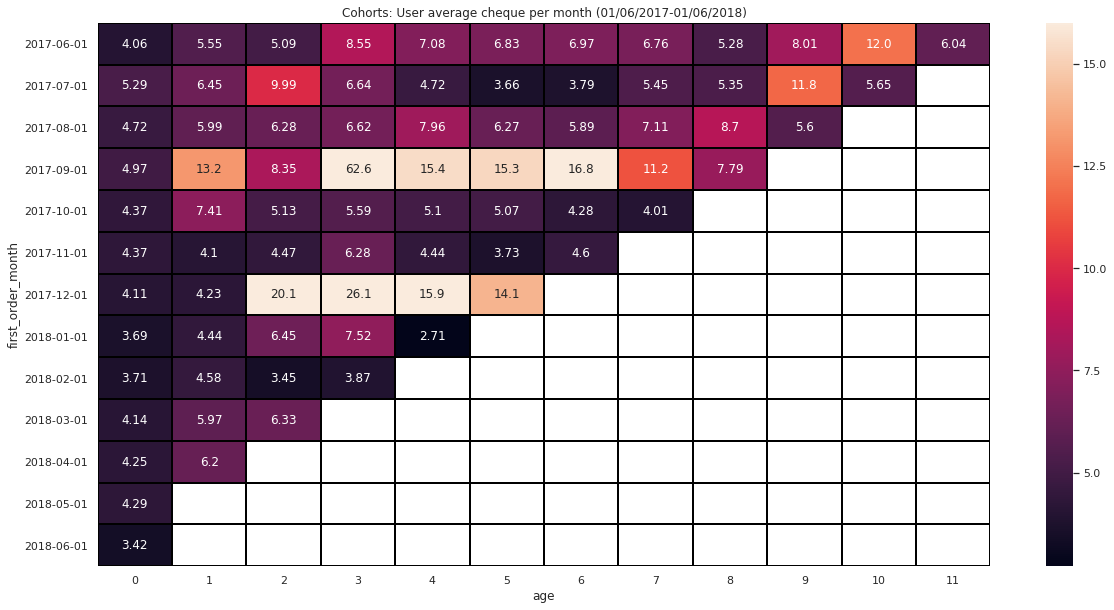

In [86]:
#визуализируем retention rate через heatmap
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User average cheque per month (01/06/2017-01/06/2018)')
ax = sns.heatmap(cheques_grouped_by_cohorts, annot=True, fmt='.3', linewidths=1, linecolor='black', vmax=16)
ax.set_yticklabels(cheques_grouped_by_cohorts.index.date)


Исходя из данных хитмапа выше, можно отследить, что средний чек редко превышает 10у.е., но есть две когорты, в которых средний чек выше других - это сентябрьская и декабрьская когорты клиентов. Когорта сентября на протяжение периода декабрь 17 -апрель 18 держат высокий средний чек, в декабре его сумма больее 60 у.е., что больше всех остальных периодов. Крогорта декабря 17 также показывает высокую выручку  в период февраль - май 18. Начинают все когорты с небольшого среднего чека, не более 5.2. у.е., вероятно, люди еще не достаточно уверены в сервисе и начинают с малого, в следующие месяцы чеки уже выше для большинства когорт. 'Усредненное значение пользовательского чека  - 5.9 у.е.'

<hr style="border: 1px solid #000;"> 

In [87]:
#проанализируем первый период  как оптимальный для расчета среднего чека посклольку большинство чеков приходится на него:
cheques_grouped_by_cohorts_gr = cheques_grouped_by_cohorts.reset_index()
cheques_grouped_by_cohorts_gr_6mnth = cheques_grouped_by_cohorts_gr.iloc[:, 12]
cheques_grouped_by_cohorts_gr_6mnth

0    6.04
1     nan
2     nan
3     nan
4     nan
5     nan
6     nan
7     nan
8     nan
9     nan
10    nan
11    nan
12    nan
Name: 11, dtype: float64

In [88]:
cheques_grouped_by_cohorts_gr_avg = cheques_grouped_by_cohorts_gr_6mnth.mean()
# UPD: #UPD2
"Усредненное значение пользовательского чека - {:.1f} у.е.".format (cheques_grouped_by_cohorts_gr_avg)

'Усредненное значение пользовательского чека - 6.0 у.е.'

In [89]:
orders

buy_ts  revenue                   uid    first_order_date  \
0     2017-06-01 00:10:00       17  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00      5.8  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00      0.3   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_month order_month  
0            2017-06-01  2017-06-01  
1            2017-06-01  2017-06-01  
2            2017-06-01  2017-06-01  
3            2017-06-01  2017-06-01  
4            2017-06-01  2017-06-01  
...                 ...         ...  
50410        2018-05-01  2018-05-01  
50411        2018-05-01  2018-05-01  
50412        2018-05-01  2018-05-01  
50413        2018-05-01  2018-05-01  
50414        2018-06-01  2018-06-01  

[50415 rows x 6 columns]

In [90]:
#добавим столбец с количеством клинетов для каждой когорты и назовем его n_buyers
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [91]:
сohorts_orders = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
сohorts_orders.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58

In [92]:
сohorts_orders_report = pd.merge(cohort_sizes, сohorts_orders, on='first_order_month')
сohorts_orders_report.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58

In [93]:
#зададим маржинальность 90% и рассчитаем валовую прибыль gp (исправлена опечататка)
сohorts_orders_report['gp'] = сohorts_orders_report['revenue'] * 0.9

In [94]:
#расчитаем периоды жизни когорты
сohorts_orders_report['age'] = (сohorts_orders_report['order_month'] - сohorts_orders_report['first_order_month']) / np.timedelta64(1, 'M')
сohorts_orders_report['age'] = сohorts_orders_report['age'].round().astype('int')

In [95]:
сohorts_orders_report.head()

first_order_month  n_buyers order_month  revenue      gp  age
0        2017-06-01      2023  2017-06-01  9557.49 8601.74    0
1        2017-06-01      2023  2017-07-01   981.82  883.64    1
2        2017-06-01      2023  2017-08-01   885.34  796.81    2
3        2017-06-01      2023  2017-09-01  1931.30 1738.17    3
4        2017-06-01      2023  2017-10-01  2068.58 1861.72    4

In [96]:
#рассчитаем LTV с одного клиента по месяцам его пользования сайтом
сohorts_orders_report['ltv'] = сohorts_orders_report['gp'] / сohorts_orders_report['n_buyers']

In [97]:
output = сohorts_orders_report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(3)
    
output.fillna('')

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01        4.25 0.44 0.39 0.86 0.92 0.66 0.85 0.52 0.50 0.55 0.51 0.23
2017-07-01        5.41 0.30 0.56 0.32 0.16 0.14 0.11 0.13 0.14 0.13 0.14     
2017-08-01        4.75 0.42 0.41 0.35 0.45 0.26 0.19 0.36 0.26 0.17          
2017-09-01        5.08 1.01 0.47 3.58 0.36 0.58 0.63 0.22 0.17               
2017-10-01        4.50 0.48 0.17 0.14 0.14 0.11 0.08 0.10                    
2017-11-01        4.64 0.36 0.18 0.29 0.13 0.05 0.10                         
2017-12-01        4.26 0.23 0.83 0.96 0.28 0.30                              
2018-01-01        3.72 0.27 0.27 0.13 0.06                                   
2018-02-01        3.74 0.25 0.07 0.07                                        
2018-03-01        4.36 0.27 0.28                                             
2018-04-01        4.19 0.48                                                  
2018-05-01        4.20                                                       
2018-06-01        3.08

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01'),
 Text(0, 12.5, '2018-06-01')]

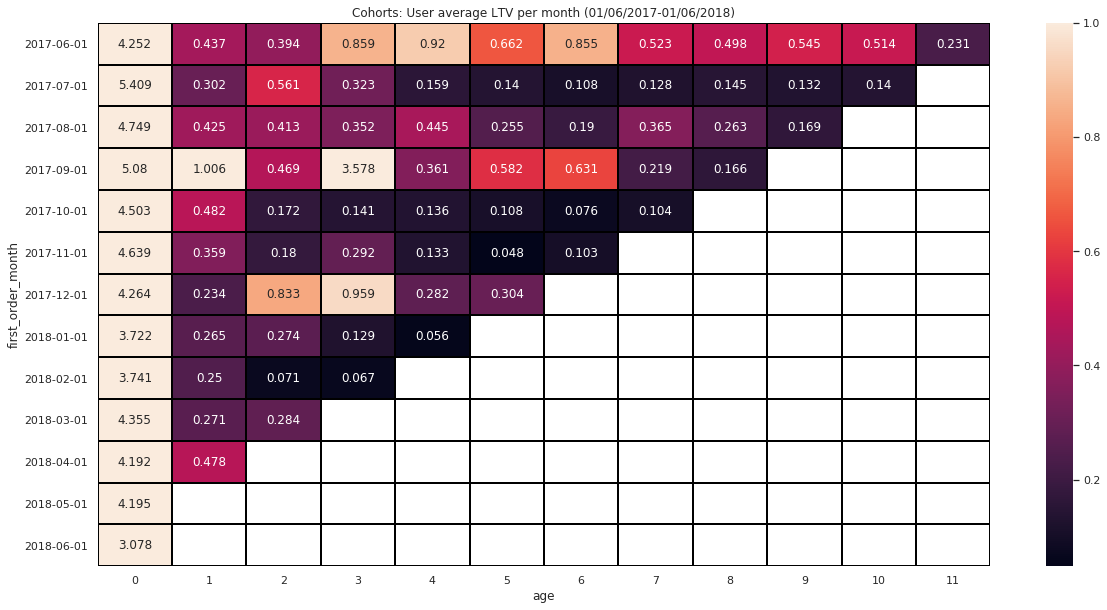

In [98]:
#визуализируем LTV rate через heatmap
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User average LTV per month (01/06/2017-01/06/2018)')
ax = sns.heatmap(output, annot=True, fmt='.4', linewidths=1, linecolor='black', vmax=1)
ax.set_yticklabels(cheques_grouped_by_cohorts.index.date)

 Исходя из данных хитмапа выше, можно отследить, что средний LTV на клинета в первый месяц равен от 3 до 5,4 у.е. Далее у  большинства он падает ниже 1, хотя есть ряд когорт, у которых встречаются LTV выше - самый высокий уровень - когорта сентября 17 в 3 период своего жизненного цикла. Самыми прибыльними на первый взгляд кажутся когорты июня 17, сентября и декабря 18 годов. 'Усредненное значение LTV за период 6 месяцев - 7.2 у.е.'

In [99]:
#сделаем срез 6 месяцев по когортам, возьмем этот период как средний период жизни когорты и посчитаем LTV для когорт, 
#которые прожили этот промежуток
output_table = output.reset_index()

LTV_gr_6mnth = output_table.iloc[:6, 1:7]
LTV_gr_6mnth

age    0    1    2    3    4    5
0   4.25 0.44 0.39 0.86 0.92 0.66
1   5.41 0.30 0.56 0.32 0.16 0.14
2   4.75 0.42 0.41 0.35 0.45 0.26
3   5.08 1.01 0.47 3.58 0.36 0.58
4   4.50 0.48 0.17 0.14 0.14 0.11
5   4.64 0.36 0.18 0.29 0.13 0.05

In [100]:
LTV_gr_6mnth['LTV'] = LTV_gr_6mnth.sum(axis=1)
LTV_gr_6mnth

age    0    1    2    3    4    5   LTV
0   4.25 0.44 0.39 0.86 0.92 0.66  7.52
1   5.41 0.30 0.56 0.32 0.16 0.14  6.89
2   4.75 0.42 0.41 0.35 0.45 0.26  6.64
3   5.08 1.01 0.47 3.58 0.36 0.58 11.08
4   4.50 0.48 0.17 0.14 0.14 0.11  5.54
5   4.64 0.36 0.18 0.29 0.13 0.05  5.65

In [101]:
LTV_avg_6mnth = LTV_gr_6mnth['LTV'].mean()
# UPD:
"Усредненное значение LTV за период 6 месяцев - {:.1f} у.е.".format (LTV_avg_6mnth)

'Усредненное значение LTV за период 6 месяцев - 7.2 у.е.'

### Вывод по задаче  "Продажи":

**Когда люди начинают покупать?** - Время, требующееся на оформление 25% заказов - не более 4 минут с момента первого захода на сайт, но все же половине пользователей нужно время подумать - не менее 16 минут, 75% заказов оформляются не позже, чем через 48 часов. Мода (самое частовстречающееся время) равна 60 секундам. При анализе заказов, сделанных в течение 1 часа - чаще всего заказы оформляются в течении 120 секунд. Также 2455 первых заказа присутствуют с нулевым временем от захода на сайт (порядка 7%) - вероятно, это некорректно залогинившаяся информация.

**Сколько раз покупают за период?** -  в первый период пользования сайтом для каждой когорты делается максимальное число покупок - от 1370 (когорта августа 2017) до 4340 (когорта октября 2017). Самими активными когортами в первый месяц были когорты октября, ноября и декабря 2017, далее активность новых когорт идет на спад. В последующие месяцы количество заказов в когортах резко падает, в большинстве своем не превышает 100 в месяц.

**Какой средний чек?** - Исходя из данных хитмапа выше, можно отследить, что средний чек редко превышает 10у.е., но есть две когорты, в которых средний чек выше других - это сентябрьская и декабрьская когорты клиентов. Когорта сентября на протяжение периода декабрь 17 -апрель 18 держат высокий средний чек, в декабре его сумма больее 60 у.е., что больше всех остальных периодов. Крогорта декабря 17 также показывает высокую выручку  в период февраль - май 18. Начинают все когорты с небольшого среднего чека, не более 5.2. у.е., вероятно, люди еще не достаточно уверены в сервисе и начинают с малого, в следующие месяцы чеки уже выше для большинства когорт. 'Усредненное значение пользовательского чека  - 5.9 у.е.'

**Сколько денег приносят? (LTV)** -  Исходя из данных хитмапа выше, можно отследить, что средний LTV на клинета в первый месяц равен от 3 до 5,4 у.е. Далее у  большинства он падает ниже 1, хотя есть ряд когорт, у которых встречаются LTV выше - самый высокий уровень - когорта сентября 17 в 3 период своего жизненного цикла. Самыми прибыльними на первый взгляд кажутся когорты июня 17, сентября и декабря 18 годов. 'Усредненное значение LTV за период 6 месяцев - 7.2 у.е.'

[<font size="2">(к содержанию)</font>](#beginning)<br/>

## Задача - Маркетинг :<a id="task_marketing"></a>

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

In [102]:
costs

source_id         dt  costs
0             1 2017-06-01   75.2
1             1 2017-06-02  62.25
2             1 2017-06-03  36.53
3             1 2017-06-04     55
4             1 2017-06-05  57.08
...         ...        ...    ...
2537         10 2018-05-27   9.92
2538         10 2018-05-28  21.26
2539         10 2018-05-29  11.32
2540         10 2018-05-30  33.15
2541         10 2018-05-31  17.60

[2542 rows x 3 columns]

In [103]:
total_costs = costs['costs'].sum()
"Общая сумма маркетинговых зарат составила - {:.2f} у.е.".format (total_costs)

'Общая сумма маркетинговых зарат составила - 329131.62 у.е.'

In [104]:
#Суммы затрат на каждый источник
costs_pie = costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()
costs_pie

source_id     costs
0          1  20833.27
1          2  42806.04
2          3 141321.63
3          4  61073.60
4          5  51757.10
5          9   5517.49
6         10   5822.49

In [105]:
#построим диаграмму-пирог
labels = costs_pie['source_id']
values = costs_pie['costs']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Marketing costs by sources, total period')
fig.show()

In [106]:
costs['cost_month'] = costs['dt'].dt.month

In [107]:
costs

source_id         dt  costs  cost_month
0             1 2017-06-01   75.2           6
1             1 2017-06-02  62.25           6
2             1 2017-06-03  36.53           6
3             1 2017-06-04     55           6
4             1 2017-06-05  57.08           6
...         ...        ...    ...         ...
2537         10 2018-05-27   9.92           5
2538         10 2018-05-28  21.26           5
2539         10 2018-05-29  11.32           5
2540         10 2018-05-30  33.15           5
2541         10 2018-05-31  17.60           5

[2542 rows x 4 columns]

In [108]:
#Суммы затрат на каждый источник по месяцам

costs_by_month = costs.groupby(['source_id', 'cost_month']).agg({'costs': 'sum'}).reset_index()
costs_by_month

source_id  cost_month   costs
0           1           1 2186.18
1           1           2 2204.48
2           1           3 1893.09
3           1           4 1327.49
4           1           5 1467.61
..        ...         ...     ...
79         10           8  232.57
80         10           9  460.67
81         10          10  627.24
82         10          11  792.36
83         10          12  645.86

[84 rows x 3 columns]

In [109]:
#создадим пивот с тратами на маркетиг помесячно по типу источника
costs_by_month_pivot = costs_by_month.pivot_table(
        index='source_id', 
        columns='cost_month', 
        values='costs', 
        aggfunc='sum')
costs_by_month_pivot

cost_month       1        2        3       4       5       6       7       8   \
source_id                                                                       
1           2186.18  2204.48  1893.09 1327.49 1467.61 1125.61 1072.88  951.81   
2           4157.74  4474.34  3943.14  2993.7 2689.44 2427.38 2333.11 1811.05   
3          14808.78 14228.56 13080.85 9296.81 9411.42 7731.65 7674.37 6143.54   
4           5832.79  5711.96  5961.87 4408.49 4214.21  3514.8 3529.73 3217.36   
5           5371.52  5071.31  4529.62 3501.15 3669.56 2616.12 2998.14 2185.28   
9            547.16    551.5   480.29  373.49  362.17  285.22  302.54  248.93   
10           614.35   480.88   526.41  388.25  409.86  314.22  329.82  232.57   

cost_month      9        10       11       12  
source_id                                      
1          1502.01  2315.75  2445.16  2341.20  
2          2985.66  4845.00  5247.68  4897.80  
3          9963.55 15737.24 17025.34 16219.52  
4          5192.26  6420.84  5388.82  7680.47  
5          3849.14  5767.40  6325.34  5872.52  
9           415.62   609.41   683.18   657.98  
10          460.67   627.24   792.36   645.86

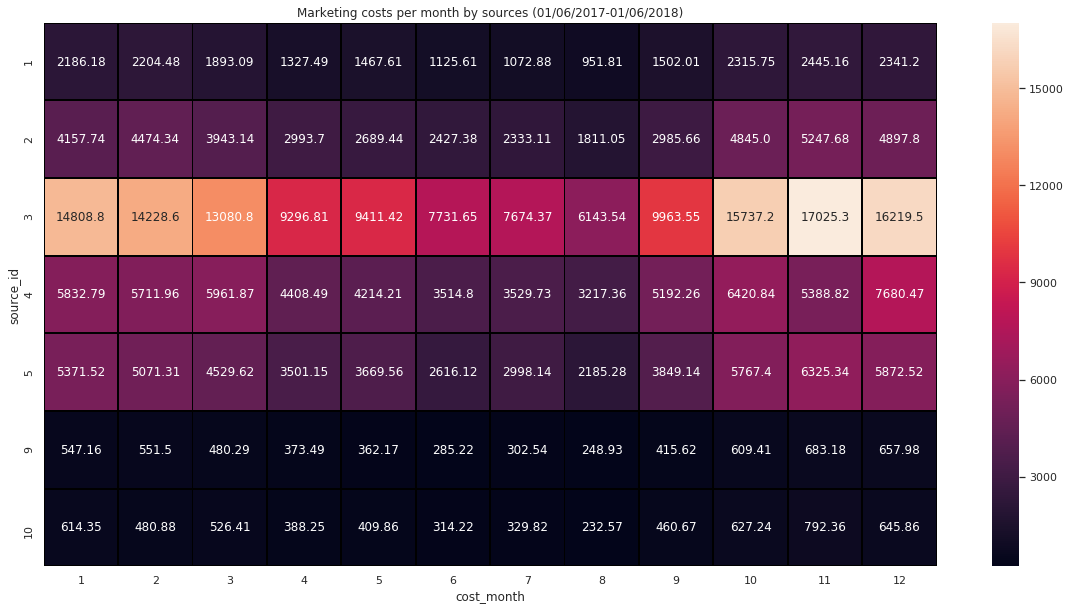

In [110]:
#визуализируем затраты по источнгикам через heatmap
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Marketing costs per month by sources (01/06/2017-01/06/2018)')
ax = sns.heatmap(costs_by_month_pivot, annot=True, fmt='.6', linewidths=1, linecolor='black')


Явно видны лидеры по маркетинговым затратам - это источники 3,4,5, причем явным лидером является источник №3, ежемесячно в него вкладывается больше,чем в другие источники првлечения клиентов.

In [111]:
#посмотрим снова нашу базу визитов, в которой есть указание источников прихода клиентов и выручка
visits.head(5)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year session_month           session_week  \
0  16879256277535980062          2017       2017-12  2017-12-18/2017-12-24   
1    104060357244891740          2018       2018-02  2018-02-19/2018-02-25   
2   7459035603376831527          2017       2017-07  2017-06-26/2017-07-02   
3  16174680259334210214          2018       2018-05  2018-05-14/2018-05-20   
4   9969694820036681168          2017       2017-12  2017-12-25/2017-12-31   

  session_date  session_duration_sec  
0   2017-12-20                  1080  
1   2018-02-19                  1680  
2   2017-07-01                     0  
3   2018-05-20                  1440  
4   2017-12-27                     0

In [112]:
#все сессии указаны не в хронологии, отсортируем время сессий по ваозрастанию

#UPD исправила
visits_gr_by_date = visits.sort_values(by='start_ts')
visits_gr_by_date.head(5)

device              end_ts  source_id            start_ts  \
308527  desktop 2017-06-01 00:02:00          5 2017-06-01 00:01:00   
260646  desktop 2017-06-01 00:02:00          3 2017-06-01 00:02:00   
245715  desktop 2017-06-01 00:16:00          3 2017-06-01 00:02:00   
235930  desktop 2017-06-01 00:04:00          3 2017-06-01 00:04:00   
11727   desktop 2017-06-01 00:11:00          1 2017-06-01 00:09:00   

                         uid  session_year session_month  \
308527  13890188992670018146          2017       2017-06   
260646  16152015161748786004          2017       2017-06   
245715  16706502037388497502          2017       2017-06   
235930   8842918131297115663          2017       2017-06   
11727   10329302124590727494          2017       2017-06   

                 session_week session_date  session_duration_sec  
308527  2017-05-29/2017-06-04   2017-06-01                 60.00  
260646  2017-05-29/2017-06-04   2017-06-01                     0  
245715  2017-05-29/2017-06-04   2017-06-01                   840  
235930  2017-05-29/2017-06-04   2017-06-01                     0  
11727   2017-05-29/2017-06-04   2017-06-01                120.00

In [113]:
#извлечем по uid источники прихода клиентов (возьмем первый источник, из которого пришел клиент)
first_source_per_user = visits_gr_by_date.groupby('uid').agg({'source_id': 'first'})
first_source_per_user

source_id
uid                            
11863502262781                3
49537067089222                2
297729379853735               3
313578113262317               2
325320750514679               5
...                         ...
18446403737806311543          5
18446424184725333426          4
18446556406699109058          3
18446621818809592527          4
18446676030785672386          3

[228169 rows x 1 columns]

In [114]:
#извлечем по uid устройство прихода клиентов (возьмем первое устройство, из которого пришел клиент)
first_device_per_user = visits_gr_by_date.groupby('uid').agg({'device': 'first'})
first_device_per_user

device
uid                          
11863502262781          touch
49537067089222          touch
297729379853735       desktop
313578113262317       desktop
325320750514679       desktop
...                       ...
18446403737806311543  desktop
18446424184725333426    touch
18446556406699109058    touch
18446621818809592527  desktop
18446676030785672386  desktop

[228169 rows x 1 columns]

In [115]:
# добавим в базу заказов источник из которого пришел клиент из  датафрейма first_source_per_user по полю uid

orders_with_source = orders.merge(first_source_per_user, on='uid')
orders_with_source

buy_ts  revenue                   uid    first_order_date  \
0     2017-06-01 00:10:00       17  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00      5.8  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00      0.3   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_month order_month  source_id  
0            2017-06-01  2017-06-01          1  
1            2017-06-01  2017-06-01          2  
2            2017-06-01  2017-06-01          2  
3            2017-06-01  2017-06-01          2  
4            2017-06-01  2017-06-01          3  
...                 ...         ...        ...  
50410        2018-05-01  2018-05-01          4  
50411        2018-05-01  2018-05-01         10  
50412        2018-05-01  2018-05-01          3  
50413        2018-05-01  2018-05-01          3  
50414        2018-06-01  2018-06-01          4  

[50415 rows x 7 columns]

In [116]:
#объединим базу заказов с первым устройством, с которого зашел клиент
orders_with_source_and_device = orders_with_source.merge(first_device_per_user, on='uid')
orders_with_source_and_device

buy_ts  revenue                   uid    first_order_date  \
0     2017-06-01 00:10:00       17  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00      5.8  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00      0.3   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_month order_month  source_id   device  
0            2017-06-01  2017-06-01          1  desktop  
1            2017-06-01  2017-06-01          2  desktop  
2            2017-06-01  2017-06-01          2  desktop  
3            2017-06-01  2017-06-01          2  desktop  
4            2017-06-01  2017-06-01          3  desktop  
...                 ...         ...        ...      ...  
50410        2018-05-01  2018-05-01          4    touch  
50411        2018-05-01  2018-05-01         10  desktop  
50412        2018-05-01  2018-05-01          3  desktop  
50413        2018-05-01  2018-05-01          3  desktop  
50414        2018-06-01  2018-06-01          4  desktop  

[50415 rows x 8 columns]

In [117]:
#рассчитаем размеры когорт по источникам
cohort_sizes_by_sources = orders_with_source_and_device.groupby(['first_order_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_by_sources.columns = [ 'order_month', 'source_id', 'n_buyers']
print(cohort_sizes_by_sources.head(20))

   order_month  source_id  n_buyers
0   2017-06-01          1       190
1   2017-06-01          2       235
2   2017-06-01          3       638
3   2017-06-01          4       413
4   2017-06-01          5       384
5   2017-06-01          9        68
6   2017-06-01         10        95
7   2017-07-01          1       160
8   2017-07-01          2       208
9   2017-07-01          3       512
10  2017-07-01          4       517
11  2017-07-01          5       423
12  2017-07-01          9        52
13  2017-07-01         10        51
14  2017-08-01          1       113
15  2017-08-01          2       123
16  2017-08-01          3       337
17  2017-08-01          4       338
18  2017-08-01          5       360
19  2017-08-01          7         1


In [118]:
#добавим размеры когорт к базе заказов
orders_with_source_and_device_with_cohorts = pd.merge(orders_with_source_and_device, cohort_sizes_by_sources, on=['order_month','source_id'])
orders_with_source_and_device_with_cohorts.head()

buy_ts  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00       17  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
2 2017-06-02 12:44:00     0.85   3644482766749211722 2017-06-01 09:22:00   
3 2017-06-02 15:08:00    12.83   3644482766749211722 2017-06-01 09:22:00   
4 2017-06-04 13:06:00    17.11   3644482766749211722 2017-06-01 09:22:00   

  first_order_month order_month  source_id   device  n_buyers  
0        2017-06-01  2017-06-01          1  desktop       190  
1        2017-06-01  2017-06-01          1  desktop       190  
2        2017-06-01  2017-06-01          1  desktop       190  
3        2017-06-01  2017-06-01          1  desktop       190  
4        2017-06-01  2017-06-01          1  desktop       190

In [119]:
#выделим месяц покупки в заказах
costs['month'] = costs['dt'].astype('datetime64[M]')
costs


source_id         dt  costs  cost_month      month
0             1 2017-06-01   75.2           6 2017-06-01
1             1 2017-06-02  62.25           6 2017-06-01
2             1 2017-06-03  36.53           6 2017-06-01
3             1 2017-06-04     55           6 2017-06-01
4             1 2017-06-05  57.08           6 2017-06-01
...         ...        ...    ...         ...        ...
2537         10 2018-05-27   9.92           5 2018-05-01
2538         10 2018-05-28  21.26           5 2018-05-01
2539         10 2018-05-29  11.32           5 2018-05-01
2540         10 2018-05-30  33.15           5 2018-05-01
2541         10 2018-05-31  17.60           5 2018-05-01

[2542 rows x 5 columns]

In [120]:
#просуммируем выручку по месяцам и источникам

costs_for_roi = costs.groupby([ 'month', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_for_roi  

month  source_id   costs
0  2017-06-01          1 1125.61
1  2017-06-01          2 2427.38
2  2017-06-01          3 7731.65
3  2017-06-01          4  3514.8
4  2017-06-01          5 2616.12
..        ...        ...     ...
79 2018-05-01          3 9411.42
80 2018-05-01          4 4214.21
81 2018-05-01          5 3669.56
82 2018-05-01          9  362.17
83 2018-05-01         10  409.86

[84 rows x 3 columns]

In [121]:
# сгруппируем заказы по месяцу, источнику и сумме выручки
for_roi_by_sources = orders_with_source_and_device_with_cohorts.groupby(['source_id', 'order_month', 'n_buyers']).agg({'revenue': 'sum'}).reset_index()
for_roi_by_sources.head()

source_id order_month  n_buyers  revenue
0          1  2017-06-01       190  1378.70
1          1  2017-07-01       160  1581.68
2          1  2017-08-01       113  1441.49
3          1  2017-09-01       227  3071.61
4          1  2017-10-01       340  3621.82

In [122]:
#добавим затраты по месяцам к заказам

roi_by_sources_table =  pd.merge(for_roi_by_sources, costs_for_roi , left_on=['order_month','source_id'], 
                                 right_on=['month','source_id'])
roi_by_sources_table.head(15)

source_id order_month  n_buyers  revenue      month   costs
0           1  2017-06-01       190  1378.70 2017-06-01 1125.61
1           1  2017-07-01       160  1581.68 2017-07-01 1072.88
2           1  2017-08-01       113  1441.49 2017-08-01  951.81
3           1  2017-09-01       227  3071.61 2017-09-01 1502.01
4           1  2017-10-01       340  3621.82 2017-10-01 2315.75
5           1  2017-11-01       324  3519.48 2017-11-01 2445.16
6           1  2017-12-01       331  2748.37 2017-12-01 2341.20
7           1  2018-01-01       238  2554.82 2018-01-01 2186.18
8           1  2018-02-01       275  2351.09 2018-02-01 2204.48
9           1  2018-03-01       281  3878.77 2018-03-01 1893.09
10          1  2018-04-01       179  2446.64 2018-04-01 1327.49
11          1  2018-05-01       241  2496.08 2018-05-01 1467.61
12          2  2017-06-01       235  1043.68 2017-06-01 2427.38
13          2  2017-07-01       208  1868.91 2017-07-01 2333.11
14          2  2017-08-01       123   929.02 2017-08-01 1811.05

In [123]:
for_roi_by_sources_for_analysys = roi_by_sources_table.groupby('source_id').agg({'n_buyers': 'sum', 'costs': 'sum'}).reset_index()
for_roi_by_sources_for_analysys

source_id  n_buyers     costs
0          1      2899  20833.27
1          2      3506  42806.04
2          3     10473 141321.63
3          4     10295  61073.60
4          5      6931  51757.10
5          9      1088   5517.49
6         10      1329   5822.49

### **Далее рассчитаем среднюю LTV за полгода по каждому из источников по "зрелым" когортам, с возрастом не менее 6 месяцев:**

In [124]:
# создадим функцию со входящими параметрами: номером рекламного канала и коэффициентом маржинальности
# (который будет равен 0.9, если не будет задан отдельно при использовании функции)
def get_LTV_pivot_by_source(source, margin_rate=0.9):  
    
    visits_sorted = visits.sort_values(by='start_ts')  # сортируем visits в хронологическом порядке для присвоения
                                                       # рекламного канала каждому пользователю (по какому он пришёл)
    
    # датафрейм юзер-канал привлечения
    first_source_per_user = (visits_sorted
                                 .groupby('uid')
                                 .agg({'source_id': 'first'})
                                 .reset_index()
                            )
    # фильтруем его, выбирая только те строки, где рекламный канал соответствует тому, 
    # который мы задали при вызове функции
    chosen_buyers = first_source_per_user[first_source_per_user['source_id'] == source]
    # соединяем с датафреймом по заказам
    orders_monthly = orders[['buy_ts', 'revenue', 'uid']]
    orders_monthly['buy_ts'] = orders_monthly['buy_ts'].astype('datetime64[M]')
    visits_by_source = orders_monthly.merge(chosen_buyers, on='uid')
    # конвертируем дату заказа в месяц
    visits_by_source['buy_ts'] = visits_by_source['buy_ts'].astype('datetime64[M]')
    # получаем месяц первого заказа каждого из пользователей
    first_orders_month = visits_by_source.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
    first_orders_month.columns = ['uid', 'first_purchase_date']
    
    # расчет размеров когорт
    cohort_sizes = first_orders_month.groupby('first_purchase_date').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_purchase_date', 'n_buyers']
    orders_first_orders_month = visits_by_source.merge(first_orders_month, on='uid')
    cohorts = (orders_first_orders_month
                                    .groupby(['buy_ts', 'first_purchase_date'])
                                    .agg({'revenue': 'sum'})
                                    .reset_index()
              )
    # если длина датафрейма с когортами > 0 (потому что есть каналы 6 и 7, по которым мы полчим пустые датафреймы,
    # т.к. по ним не было ни привлеченных покупателей и, соответственно, не было заказов.
    # Если эту проверку не сделать, функция вернет ошибку
    if len(cohorts) > 0:
        # формируем датафрейм, где будем считать LTV - соединяем данные по когортам с их размерами
        LTV = cohorts.merge(cohort_sizes, on='first_purchase_date')
        # считаем чистую прибыль относительного заданного при вызове функции margin_rate
        LTV['gp'] = LTV['revenue'] * margin_rate
        # вычисляем возраст юзера на момент каждой покупки относительно даты его первого заказа
        LTV['age'] = (LTV['buy_ts'] - LTV['first_purchase_date']) / np.timedelta64(1, 'M')
        LTV['age'] = LTV['age'].round().astype('int')
        # считаем LTV
        LTV['ltv'] = LTV['gp'] / LTV['n_buyers']
        
        # берем нужный нам горизонт в 6 месяцев
        LTV = LTV.query('age < 6 and first_purchase_date <= "2017-11-01"')
        
        # строим пивот на базе LTV-датафрейма
        LTV_pivot = LTV.pivot_table(index="first_purchase_date",
                    columns="age",
                    values="ltv",
                    aggfunc='mean').reset_index()     

        return LTV, LTV_pivot  # возвращаем датафрейм LTV (вдруг что посчитать нужно будет типа среднего чека) 
                               # и LTV_pivot
    else:
        return 'Данных для отображения нет', 'Данных для отображения нет'

In [125]:
# выведем LTV по зрелым когортам рекламного источника №1
LTV_1, LTV_pivot_1 = get_LTV_pivot_by_source(1, margin_rate=0.9)
LTV_pivot_1

age first_purchase_date    0    1    2    3    4    5
0            2017-06-01 6.53 1.97 1.99 3.38 3.84 1.84
1            2017-07-01 6.56 0.99 4.82 1.36 0.79 0.81
2            2017-08-01 6.74 1.08 0.91 0.87 0.94 0.60
3            2017-09-01 5.41 1.62 0.50 0.83 0.03 0.09
4            2017-10-01 5.42 0.95 0.22 0.35 0.06 0.10
5            2017-11-01 6.65 0.52 0.87 0.80 0.15 0.10

In [126]:
# рассчитаем суммарную LTV для кажой из зрелых когорт
LTV_pivot_1['LTV'] = LTV_pivot_1.sum(axis=1)
LTV_pivot_1

age first_purchase_date    0    1    2    3    4    5   LTV
0            2017-06-01 6.53 1.97 1.99 3.38 3.84 1.84 19.55
1            2017-07-01 6.56 0.99 4.82 1.36 0.79 0.81 15.32
2            2017-08-01 6.74 1.08 0.91 0.87 0.94 0.60 11.13
3            2017-09-01 5.41 1.62 0.50 0.83 0.03 0.09  8.49
4            2017-10-01 5.42 0.95 0.22 0.35 0.06 0.10  7.09
5            2017-11-01 6.65 0.52 0.87 0.80 0.15 0.10  9.08

In [127]:
LTV_pivot_1 = LTV_pivot_1['LTV'].mean()

"Усредненное значение LTV source1 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_1)

'Усредненное значение LTV source1 за период 6 месяцев - 11.8 у.е.'

In [128]:
# выведем LTV по зрелым когортам рекламного источника №2
LTV_2, LTV_pivot_2 = get_LTV_pivot_by_source(2, margin_rate=0.9)
LTV_pivot_2

age first_purchase_date    0    1    2    3    4    5
0            2017-06-01 4.00 0.44 0.24 1.73 1.50 0.83
1            2017-07-01 7.59 0.69 0.05 0.29 0.39 0.17
2            2017-08-01 5.16 0.84 0.16 0.23 0.46 0.06
3            2017-09-01 7.45 7.32 2.13 0.83 1.27 0.88
4            2017-10-01 6.91 2.21 0.59 0.49 0.50 0.24
5            2017-11-01 6.29 0.82 0.39 0.71 0.28 0.13

In [129]:
# рассчитаем суммарную LTV для кажой из зрелых когорт
LTV_pivot_2['LTV'] = LTV_pivot_2.sum(axis=1)
LTV_pivot_2

age first_purchase_date    0    1    2    3    4    5   LTV
0            2017-06-01 4.00 0.44 0.24 1.73 1.50 0.83  8.74
1            2017-07-01 7.59 0.69 0.05 0.29 0.39 0.17  9.18
2            2017-08-01 5.16 0.84 0.16 0.23 0.46 0.06  6.91
3            2017-09-01 7.45 7.32 2.13 0.83 1.27 0.88 19.87
4            2017-10-01 6.91 2.21 0.59 0.49 0.50 0.24 10.94
5            2017-11-01 6.29 0.82 0.39 0.71 0.28 0.13  8.62

In [130]:
LTV_pivot_2 = LTV_pivot_2['LTV'].mean()

"Усредненное значение LTV source2 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_2)

'Усредненное значение LTV source2 за период 6 месяцев - 10.7 у.е.'

In [131]:
# выведем LTV по зрелым когортам рекламного источника №3
LTV_3, LTV_pivot_3 = get_LTV_pivot_by_source(3, margin_rate=0.9)
LTV_pivot_3

age first_purchase_date    0    1    2    3    4    5
0            2017-06-01 3.96 0.10 0.17 0.28 0.17 0.17
1            2017-07-01 5.49 0.24 0.11 0.35 0.04 0.06
2            2017-08-01 4.57 0.14 0.26 0.10 0.15 0.04
3            2017-09-01 5.01 0.22 0.29 0.08 0.20 0.11
4            2017-10-01 4.31 0.41 0.11 0.06 0.10 0.09
5            2017-11-01 4.08 0.12 0.08 0.11 0.05 0.03

In [132]:
# рассчитаем суммарную LTV для кажой из зрелых когорт
LTV_pivot_3['LTV'] = LTV_pivot_3.sum(axis=1)
LTV_pivot_3

age first_purchase_date    0    1    2    3    4    5  LTV
0            2017-06-01 3.96 0.10 0.17 0.28 0.17 0.17 4.85
1            2017-07-01 5.49 0.24 0.11 0.35 0.04 0.06 6.30
2            2017-08-01 4.57 0.14 0.26 0.10 0.15 0.04 5.26
3            2017-09-01 5.01 0.22 0.29 0.08 0.20 0.11 5.91
4            2017-10-01 4.31 0.41 0.11 0.06 0.10 0.09 5.07
5            2017-11-01 4.08 0.12 0.08 0.11 0.05 0.03 4.46

In [133]:
LTV_pivot_3 = LTV_pivot_3['LTV'].mean()

"Усредненное значение LTV source3 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_3)

'Усредненное значение LTV source3 за период 6 месяцев - 5.3 у.е.'

In [134]:
# выведем LTV по зрелым когортам рекламного источника №4
LTV_4, LTV_pivot_4 = get_LTV_pivot_by_source(4, margin_rate=0.9)
LTV_pivot_4

age first_purchase_date    0    1    2    3    4    5
0            2017-06-01 4.27 0.04 0.15 0.41 1.03 1.34
1            2017-07-01 4.99 0.05 0.07 0.14 0.05 0.06
2            2017-08-01 4.56 0.15 0.12 0.24 0.13 0.19
3            2017-09-01 4.29 0.43 0.28 0.26 0.04 0.21
4            2017-10-01 3.93 0.13 0.14 0.10 0.11 0.08
5            2017-11-01 4.63 0.58 0.09 0.36 0.17 0.04

In [135]:
# рассчитаем суммарную LTV для кажой из зрелых когорт
LTV_pivot_4['LTV'] = LTV_pivot_4.sum(axis=1)
LTV_pivot_4

age first_purchase_date    0    1    2    3    4    5  LTV
0            2017-06-01 4.27 0.04 0.15 0.41 1.03 1.34 7.25
1            2017-07-01 4.99 0.05 0.07 0.14 0.05 0.06 5.37
2            2017-08-01 4.56 0.15 0.12 0.24 0.13 0.19 5.39
3            2017-09-01 4.29 0.43 0.28 0.26 0.04 0.21 5.52
4            2017-10-01 3.93 0.13 0.14 0.10 0.11 0.08 4.49
5            2017-11-01 4.63 0.58 0.09 0.36 0.17 0.04 5.88

In [136]:
LTV_pivot_4 = LTV_pivot_4['LTV'].mean()

"Усредненное значение LTV source4 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_4)

'Усредненное значение LTV source4 за период 6 месяцев - 5.6 у.е.'

In [137]:
# выведем LTV по зрелым когортам рекламного источника №5
LTV_5, LTV_pivot_5 = get_LTV_pivot_by_source(5, margin_rate=0.9)
LTV_pivot_5

age first_purchase_date    0    1    2     3    4    5
0            2017-06-01 4.45 0.81 0.40  0.79 0.60 0.27
1            2017-07-01 4.76 0.29 0.41  0.14 0.09 0.10
2            2017-08-01 4.55 0.68 0.75  0.64 0.97 0.54
3            2017-09-01 5.58 0.16 0.30 14.55 0.70 1.82
4            2017-10-01 4.58 0.20 0.11  0.11 0.10 0.09
5            2017-11-01 4.10 0.17 0.11  0.05 0.12 0.04

In [138]:
# рассчитаем суммарную LTV для кажой из зрелых когорт
LTV_pivot_5['LTV'] = LTV_pivot_5.sum(axis=1)
LTV_pivot_5

age first_purchase_date    0    1    2     3    4    5   LTV
0            2017-06-01 4.45 0.81 0.40  0.79 0.60 0.27  7.32
1            2017-07-01 4.76 0.29 0.41  0.14 0.09 0.10  5.78
2            2017-08-01 4.55 0.68 0.75  0.64 0.97 0.54  8.12
3            2017-09-01 5.58 0.16 0.30 14.55 0.70 1.82 23.10
4            2017-10-01 4.58 0.20 0.11  0.11 0.10 0.09  5.19
5            2017-11-01 4.10 0.17 0.11  0.05 0.12 0.04  4.59

In [139]:
LTV_pivot_5 = LTV_pivot_5['LTV'].mean()

"Усредненное значение LTV source5 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_5)

'Усредненное значение LTV source5 за период 6 месяцев - 9.0 у.е.'

In [140]:
# выведем LTV по зрелым когортам рекламного источника №9
LTV_9, LTV_pivot_9 = get_LTV_pivot_by_source(9, margin_rate=0.9)
LTV_pivot_9

age first_purchase_date    0    1    2    3    4    5
0            2017-06-01 3.21 0.06 0.53 0.55 0.24 0.40
1            2017-07-01 4.02 0.14 0.56 0.44 0.33 0.06
2            2017-08-01 3.67 0.18 0.58 0.21 0.05 0.06
3            2017-09-01 3.87 0.92 0.57 0.72 0.54 0.12
4            2017-10-01 4.56 0.49 0.39 0.10 0.26 0.49
5            2017-11-01 3.37 0.12 0.15 0.26 0.14 0.03

In [141]:
# рассчитаем суммарную LTV для кажой из зрелых когорт
LTV_pivot_9['LTV'] = LTV_pivot_9.sum(axis=1)
LTV_pivot_9

age first_purchase_date    0    1    2    3    4    5  LTV
0            2017-06-01 3.21 0.06 0.53 0.55 0.24 0.40 4.99
1            2017-07-01 4.02 0.14 0.56 0.44 0.33 0.06 5.55
2            2017-08-01 3.67 0.18 0.58 0.21 0.05 0.06 4.74
3            2017-09-01 3.87 0.92 0.57 0.72 0.54 0.12 6.73
4            2017-10-01 4.56 0.49 0.39 0.10 0.26 0.49 6.29
5            2017-11-01 3.37 0.12 0.15 0.26 0.14 0.03 4.05

In [142]:
LTV_pivot_9 = LTV_pivot_9['LTV'].mean()

"Усредненное значение LTV source9 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_9)

'Усредненное значение LTV source9 за период 6 месяцев - 5.4 у.е.'

In [143]:
# выведем LTV по зрелым когортам рекламного источника №9
LTV_10, LTV_pivot_10 = get_LTV_pivot_by_source(10, margin_rate=0.9)
LTV_pivot_10

age first_purchase_date    0    1    2    3    4    5
0            2017-06-01 2.17 0.10  nan  nan  nan  nan
1            2017-07-01 3.12 0.03  nan 0.13  nan  nan
2            2017-08-01 4.50 0.10 0.30  nan  nan  nan
3            2017-09-01 2.01 0.06 0.07 0.17 0.03  nan
4            2017-10-01 2.36 0.08 0.01 0.02 0.03 0.01
5            2017-11-01 4.16 0.05 0.01 0.17 0.09 0.04

In [144]:
# рассчитаем суммарную LTV для кажой из зрелых когорт
LTV_pivot_10['LTV'] = LTV_pivot_10.sum(axis=1)
LTV_pivot_10

age first_purchase_date    0    1    2    3    4    5  LTV
0            2017-06-01 2.17 0.10  nan  nan  nan  nan 2.28
1            2017-07-01 3.12 0.03  nan 0.13  nan  nan 3.28
2            2017-08-01 4.50 0.10 0.30  nan  nan  nan 4.90
3            2017-09-01 2.01 0.06 0.07 0.17 0.03  nan 2.34
4            2017-10-01 2.36 0.08 0.01 0.02 0.03 0.01 2.50
5            2017-11-01 4.16 0.05 0.01 0.17 0.09 0.04 4.53

In [145]:
LTV_pivot_10 = LTV_pivot_10['LTV'].mean()

"Усредненное значение LTV source10 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_10)

'Усредненное значение LTV source10 за период 6 месяцев - 3.3 у.е.'

**Подытожим расчет средней LTV  по зрелым когортам:**

In [146]:
"Усредненное значение LTV source1 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_1)

'Усредненное значение LTV source1 за период 6 месяцев - 11.8 у.е.'

In [147]:
"Усредненное значение LTV source2 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_2)

'Усредненное значение LTV source2 за период 6 месяцев - 10.7 у.е.'

In [148]:
"Усредненное значение LTV source3 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_3)

'Усредненное значение LTV source3 за период 6 месяцев - 5.3 у.е.'

In [149]:
"Усредненное значение LTV source4 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_4)

'Усредненное значение LTV source4 за период 6 месяцев - 5.6 у.е.'

In [150]:
"Усредненное значение LTV source5 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_5)

'Усредненное значение LTV source5 за период 6 месяцев - 9.0 у.е.'

In [151]:
"Усредненное значение LTV source9 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_9)

'Усредненное значение LTV source9 за период 6 месяцев - 5.4 у.е.'

In [152]:
"Усредненное значение LTV source10 за период 6 месяцев - {:.1f} у.е.".format (LTV_pivot_10)

'Усредненное значение LTV source10 за период 6 месяцев - 3.3 у.е.'

In [153]:
# Теперь напишем функцию для получения ROMI-пивота на основании полученного датафрейма LTV:
# передаем в функцию LTV, номер рекламного канала, датафрейм с затратами, margin_rate

def get_ROMI_pivot_by_source(LTV, source, costs=costs, margin_rate=0.5):

    if type(LTV) is not str: # чтобы не попасть на пустой датафрейм (как будет при подсчета для 5 и 6 каналов)
        
        # из таблицы затрат выделяем строки, относящиеся к нужному нам рекламному каналу
        costs_cac = costs[costs['source_id'] == source]
        # преобразование даты к месяцу
        costs_cac['dt'] = costs_cac['dt'].astype('datetime64[M]')
        # считаем сумму затрат по месяцам (по выбранному ранее каналу рекламы)
        all_costs = costs_cac.groupby('dt')['costs'].sum().to_frame().reset_index()
        # выбираем те данные, которые относятся к нашему шестимесячному горизонту
        all_costs = all_costs.query('dt <= "2017-11-01"')

        # формируем датафрейм, где будем считать CAC
        final_cac = LTV.merge(all_costs, left_on='first_purchase_date', right_on='dt')
        # вычисления CAC и ROMI
        final_cac['cac'] = final_cac['costs']/final_cac['n_buyers']
        final_cac['romi'] = final_cac['ltv']/final_cac['cac']

        # формируем пивот ROMI
        romi_pivot = final_cac.pivot_table(index='first_purchase_date', columns='age',
                                           values='romi').round(2)

        # ещё один пивот ROMI, но уже с накопительным отображением метрики
        romi_pivot_cumsum = romi_pivot.cumsum(axis=1).round(2)

        if len(romi_pivot.columns) < 12:
            for i in range(len(romi_pivot.columns), 12):
                romi_pivot.loc[:, i] = np.NaN

        return final_cac, romi_pivot, romi_pivot_cumsum
    
    else:
        return 'Данных для отображения нет', 'Данных для отображения нет', 'Данных для отображения нет'

In [154]:
#применим функцию для оценки источника 1 по нашим зрелым когортам ( для более детального изучения эффективности
# мы можем детализированно посмотреть cac, romi, cumsum по любому из источников):
cac_1, romi_1, romi_cumsum_1 = get_ROMI_pivot_by_source(LTV_1, 1, margin_rate=0.9)
romi_cumsum_1


age                    0    1    2    3    4    5
first_purchase_date                              
2017-06-01          1.10 1.43 1.77 2.34 2.99  3.3
2017-07-01          0.98 1.13 1.85 2.05 2.17 2.29
2017-08-01           0.8 0.93 1.04 1.14 1.25 1.32
2017-09-01          0.82 1.07 1.15 1.28 1.29  1.3
2017-10-01           0.8 0.94 0.97 1.02 1.03 1.04
2017-11-01          0.88 0.95 1.06 1.17 1.19  1.2

In [155]:
# подготовим датасет для расчета для расчета среднего romi по каждому рекламному истоянику:
LTV_avgerage_by_source_list = pd.DataFrame({'source_id': [1,2,3,4,5,9,10], 'ltv_6mnth': [11.8,10.7,5.3,5.6,9.0,5.4,3.3]})
LTV_avgerage_by_source_list

source_id  ltv_6mnth
0          1       11.8
1          2       10.7
2          3        5.3
3          4        5.6
4          5          9
5          9        5.4
6         10        3.3

In [156]:
# рассчитаем сас поделив общие расходы на количество новых клиентов
for_roi_by_sources_for_analysys['cac'] =for_roi_by_sources_for_analysys['costs']/for_roi_by_sources_for_analysys['n_buyers']
for_roi_by_sources_for_analysys

source_id  n_buyers     costs   cac
0          1      2899  20833.27  7.19
1          2      3506  42806.04 12.21
2          3     10473 141321.63 13.49
3          4     10295  61073.60  5.93
4          5      6931  51757.10  7.47
5          9      1088   5517.49  5.07
6         10      1329   5822.49  4.38

ltv по источникам = revenue (за 6 мес с источника)/новых покупателей за 6 мес

In [157]:
#объединим среднегодовые САС и LTV за полгода
roi_6_mnth_analysys = pd.merge(for_roi_by_sources_for_analysys, LTV_avgerage_by_source_list , on=['source_id'])
roi_6_mnth_analysys                               

source_id  n_buyers     costs   cac  ltv_6mnth
0          1      2899  20833.27  7.19       11.8
1          2      3506  42806.04 12.21       10.7
2          3     10473 141321.63 13.49        5.3
3          4     10295  61073.60  5.93        5.6
4          5      6931  51757.10  7.47          9
5          9      1088   5517.49  5.07        5.4
6         10      1329   5822.49  4.38        3.3

In [158]:
#рассчитаем romi за полгода
roi_6_mnth_analysys['romi'] = roi_6_mnth_analysys['ltv_6mnth']/roi_6_mnth_analysys['cac']
roi_6_mnth_analysys

source_id  n_buyers     costs   cac  ltv_6mnth  romi
0          1      2899  20833.27  7.19       11.8  1.64
1          2      3506  42806.04 12.21       10.7  0.88
2          3     10473 141321.63 13.49        5.3  0.39
3          4     10295  61073.60  5.93        5.6  0.94
4          5      6931  51757.10  7.47          9  1.21
5          9      1088   5517.49  5.07        5.4  1.06
6         10      1329   5822.49  4.38        3.3  0.75

In [159]:
# посмотрим на графике соотношение выручки и затрат за весь период
fig = go.Figure(data=[
    go.Bar(name='cac', x=roi_6_mnth_analysys['source_id'], y=roi_6_mnth_analysys['cac']),
    go.Bar(name='ltv', x=roi_6_mnth_analysys['source_id'], y=roi_6_mnth_analysys['ltv_6mnth']),
        
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title='cac, ltv Dec-May by source')
fig.show()

In [160]:
# визуализируем ROMI по рекламным источникам 
fig = px.bar(roi_6_mnth_analysys, x='source_id', y='romi', title='ROMI Dec-May by source ')


fig.show()

На гистограмме видно, что только у источников №1,5,9 ltv выше сас что говорит нам о том, что клиент в среднем приносит нам больше денег, чем мы в него вложили, что хорошо.
На барчарте видно, что за уровень 1 (окупаемости) вошли лишь 3 источника - №1,5,9 - соответственно, можно  их рекомендовать как приносящие доход. Наиболее экономически эффективным можно считать источник №1 -romi 1.64 , далее №5 - romi - 1.2, далее №9 - romi 1.06.

In [161]:
#напомним себе датафрейм заказов по когортам
сohorts_orders_report.head()

first_order_month  n_buyers order_month  revenue      gp  age  ltv
0        2017-06-01      2023  2017-06-01  9557.49 8601.74    0 4.25
1        2017-06-01      2023  2017-07-01   981.82  883.64    1 0.44
2        2017-06-01      2023  2017-08-01   885.34  796.81    2 0.39
3        2017-06-01      2023  2017-09-01  1931.30 1738.17    3 0.86
4        2017-06-01      2023  2017-10-01  2068.58 1861.72    4 0.92

In [162]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [163]:
# считаем расходы за месяц ьез источников
monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
monthly_costs.head()

month    costs
0 2017-06-01 18015.00
1 2017-07-01 18240.59
2 2017-08-01 14790.54
3 2017-09-01 24368.91
4 2017-10-01 36322.88

In [164]:
#Добавим данные о расходах в отчёт и посчитаем CAC
report_new = pd.merge(сohorts_orders_report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

first_order_month  n_buyers order_month  revenue      gp  age  ltv  \
0        2017-06-01      2023  2017-06-01  9557.49 8601.74    0 4.25   
1        2017-06-01      2023  2017-07-01   981.82  883.64    1 0.44   
2        2017-06-01      2023  2017-08-01   885.34  796.81    2 0.39   
3        2017-06-01      2023  2017-09-01  1931.30 1738.17    3 0.86   
4        2017-06-01      2023  2017-10-01  2068.58 1861.72    4 0.92   

       month    costs  cac  
0 2017-06-01 18015.00 8.91  
1 2017-06-01 18015.00 8.91  
2 2017-06-01 18015.00 8.91  
3 2017-06-01 18015.00 8.91  
4 2017-06-01 18015.00 8.91

In [165]:
#Рассчитаем ROMI: поделим LTV на CAC
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [166]:
#посчитаем накопительный ROMI по когортам
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2)

age                 0    1    2    3    4    5    6    7    8    9    10  11
first_order_month                                                           
2017-06-01        0.48 0.53 0.57 0.67 0.77 0.84 0.94    1 1.06 1.12 1.17 1.2
2017-07-01        0.57  0.6 0.66  0.7 0.71 0.73 0.74 0.75 0.77 0.78  0.8 nan
2017-08-01        0.44 0.48 0.52 0.55 0.59 0.61 0.63 0.67 0.69 0.71  nan nan
2017-09-01        0.54 0.64 0.69 1.07 1.11 1.17 1.24 1.26 1.28  nan  nan nan
2017-10-01        0.54  0.6 0.62 0.63 0.65 0.66 0.67 0.68  nan  nan  nan nan
2017-11-01         0.5 0.54 0.56 0.59  0.6 0.61 0.62  nan  nan  nan  nan nan
2017-12-01        0.49 0.51 0.61 0.72 0.75 0.79  nan  nan  nan  nan  nan nan
2018-01-01        0.37  0.4 0.43 0.44 0.45  nan  nan  nan  nan  nan  nan nan
2018-02-01        0.42 0.45 0.45 0.46  nan  nan  nan  nan  nan  nan  nan nan
2018-03-01        0.51 0.54 0.57  nan  nan  nan  nan  nan  nan  nan  nan nan
2018-04-01        0.43 0.48  nan  nan  nan  nan  nan  nan  nan  nan  nan nan
2018-05-01        0.56  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan nan

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01')]

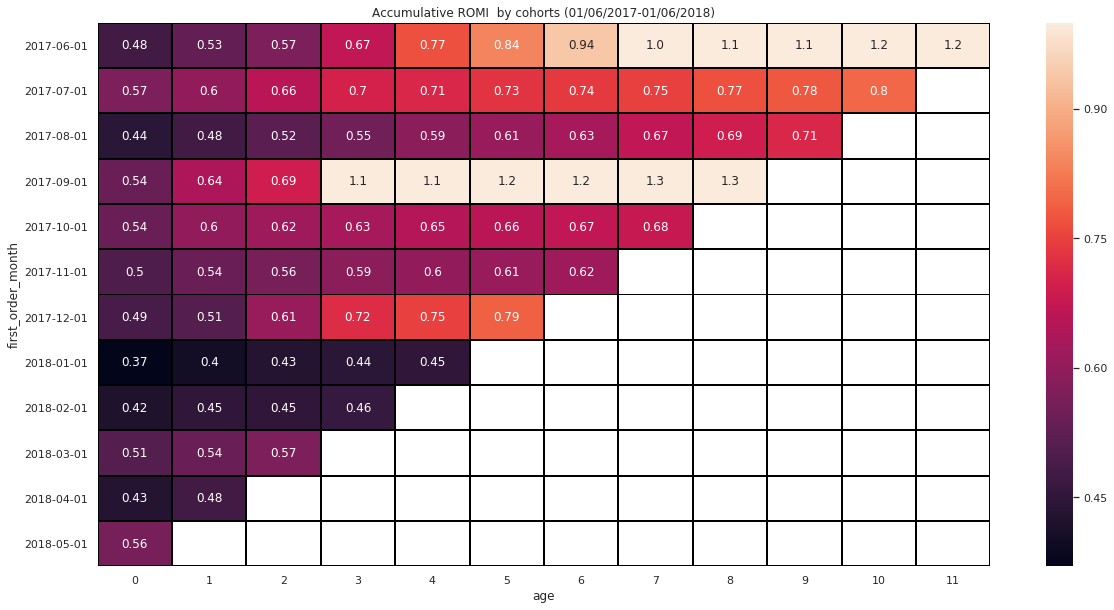

In [167]:
#визуализируем накопительный romi по когортам через heatmap
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Accumulative ROМI  by cohorts (01/06/2017-01/06/2018)')
ax = sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2', linewidths=1, linecolor='black', vmax=1)
ax.set_yticklabels(cheques_grouped_by_cohorts.index.date)

Исходя из данных хитмапа есть когорты, которые окупаются быстро, например когорта сентября (за 4 месяца), но в среднем требуется порядка 11-12 месяцев для того, чтобы когорта окупилась.

In [168]:
# усредним ROMI или LTV всех когорт за каждый месяц их жизни, чтобы узнать, когда в среднем окупается когорта
output.cumsum(axis=1).mean(axis=0)

age
0    0.49
1    0.52
2    0.57
3    0.65
4    0.70
5    0.77
6    0.81
7    0.87
8    0.95
9    0.87
10   0.99
11   1.20
dtype: float64

Поскольку у нас нет затрат по устройствам, мы проанализируем LTV, что даст нам понимание сколько денег приносят нам клиенты в среднем по устройствам:

In [169]:
#построим диаграмму-пирог
#видно явное доминирование в оформлении заказов устройства - десктоп.

labels = orders_with_source_and_device['device'].unique()
values = orders_with_source_and_device['device'].value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.update_layout(title='Type of devices for customers, that made an order')
fig.show()

<hr style="border: 1px solid #000;"> 

In [170]:
# выведем датасет заказов с расчетом количества новых покупателей по месяцам
orders_with_source_and_device_with_cohorts.head()

buy_ts  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00       17  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
2 2017-06-02 12:44:00     0.85   3644482766749211722 2017-06-01 09:22:00   
3 2017-06-02 15:08:00    12.83   3644482766749211722 2017-06-01 09:22:00   
4 2017-06-04 13:06:00    17.11   3644482766749211722 2017-06-01 09:22:00   

  first_order_month order_month  source_id   device  n_buyers  
0        2017-06-01  2017-06-01          1  desktop       190  
1        2017-06-01  2017-06-01          1  desktop       190  
2        2017-06-01  2017-06-01          1  desktop       190  
3        2017-06-01  2017-06-01          1  desktop       190  
4        2017-06-01  2017-06-01          1  desktop       190

In [171]:
# отсортируем заказы сделанные только с настольных ПК
orders_through_desktop = orders_with_source_and_device_with_cohorts[orders_with_source_and_device_with_cohorts['device']\
                                                                    == 'desktop']
orders_through_desktop

buy_ts  revenue                   uid    first_order_date  \
0     2017-06-01 00:10:00       17  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
2     2017-06-02 12:44:00     0.85   3644482766749211722 2017-06-01 09:22:00   
3     2017-06-02 15:08:00    12.83   3644482766749211722 2017-06-01 09:22:00   
4     2017-06-04 13:06:00    17.11   3644482766749211722 2017-06-01 09:22:00   
...                   ...      ...                   ...                 ...   
50405 2018-04-27 08:20:00      3.3   7090266905106962797 2018-04-27 08:20:00   
50407 2018-04-27 14:40:00     2.44   3758129106499827177 2018-04-27 14:40:00   
50409 2018-04-29 11:03:00     1.22   9143285498106689138 2018-04-29 11:03:00   
50413 2018-04-30 16:00:00     2.33    569095309392694877 2018-04-30 16:00:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_month order_month  source_id   device  n_buyers  
0            2017-06-01  2017-06-01          1  desktop       190  
1            2017-06-01  2017-06-01          1  desktop       190  
2            2017-06-01  2017-06-01          1  desktop       190  
3            2017-06-01  2017-06-01          1  desktop       190  
4            2017-06-01  2017-06-01          1  desktop       190  
...                 ...         ...        ...      ...       ...  
50405        2018-04-01  2018-04-01         10  desktop       107  
50407        2018-04-01  2018-04-01         10  desktop       107  
50409        2018-04-01  2018-04-01         10  desktop       107  
50413        2018-04-01  2018-04-01         10  desktop       107  
50414        2018-06-01  2018-06-01          4  desktop         1  

[40927 rows x 9 columns]

In [172]:
#добавим столбец с количеством клиентов для каждой когорты и назовем его n_buyers
cohort_sizes_desktop = orders_through_desktop.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_desktop.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes_desktop.head())

  first_order_month  n_buyers
0        2017-06-01      1702
1        2017-07-01      1526
2        2017-08-01      1114
3        2017-09-01      2059
4        2017-10-01      3532


In [173]:
#просуммируем выручку по месяцам
сohorts_orders_desktop = orders_through_desktop.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
сohorts_orders_desktop.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  8321.37
1        2017-06-01  2017-07-01   882.43
2        2017-06-01  2017-08-01   844.70
3        2017-06-01  2017-09-01  1905.09
4        2017-06-01  2017-10-01  1992.87

In [174]:
# объединим выручку по месяцам с количеством новых покупателей

сohorts_orders_report_desktop = pd.merge(cohort_sizes_desktop, сohorts_orders_desktop, on='first_order_month')
сohorts_orders_report_desktop.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01      1702  2017-06-01  8321.37
1        2017-06-01      1702  2017-07-01   882.43
2        2017-06-01      1702  2017-08-01   844.70
3        2017-06-01      1702  2017-09-01  1905.09
4        2017-06-01      1702  2017-10-01  1992.87

In [175]:
#зададим маржинальность 90% и рассчитаем валовую прибыль gp
сohorts_orders_report_desktop['gp'] = сohorts_orders_report_desktop['revenue'] * 0.9
сohorts_orders_report_desktop.head()

first_order_month  n_buyers order_month  revenue      gp
0        2017-06-01      1702  2017-06-01  8321.37 7489.23
1        2017-06-01      1702  2017-07-01   882.43  794.19
2        2017-06-01      1702  2017-08-01   844.70  760.23
3        2017-06-01      1702  2017-09-01  1905.09 1714.58
4        2017-06-01      1702  2017-10-01  1992.87 1793.58

In [176]:
#расчитаем периоды жизни когорты
сohorts_orders_report_desktop['age'] = (сohorts_orders_report_desktop['order_month'] - сohorts_orders_report_desktop['first_order_month']) / np.timedelta64(1, 'M')
сohorts_orders_report_desktop['age'] = сohorts_orders_report_desktop['age'].round().astype('int')

In [177]:
#расчитаем ltv
сohorts_orders_report_desktop['ltv'] = сohorts_orders_report_desktop['gp'] / сohorts_orders_report_desktop['n_buyers']

In [178]:
output_desktop = сohorts_orders_report_desktop.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(3)
    
output.fillna('')

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01        0.48 0.05 0.04 0.10 0.10 0.07 0.10 0.06 0.06 0.06 0.06 0.03
2017-07-01        0.57 0.03 0.06 0.03 0.02 0.01 0.01 0.01 0.02 0.01 0.01     
2017-08-01        0.44 0.04 0.04 0.03 0.04 0.02 0.02 0.03 0.02 0.02          
2017-09-01        0.54 0.11 0.05 0.38 0.04 0.06 0.07 0.02 0.02               
2017-10-01        0.54 0.06 0.02 0.02 0.02 0.01 0.01 0.01                    
2017-11-01        0.50 0.04 0.02 0.03 0.01 0.01 0.01                         
2017-12-01        0.49 0.03 0.10 0.11 0.03 0.03                              
2018-01-01        0.37 0.03 0.03 0.01 0.01                                   
2018-02-01        0.42 0.03 0.01 0.01                                        
2018-03-01        0.51 0.03 0.03                                             
2018-04-01        0.43 0.05                                                  
2018-05-01        0.56

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01'),
 Text(0, 12.5, '2018-06-01')]

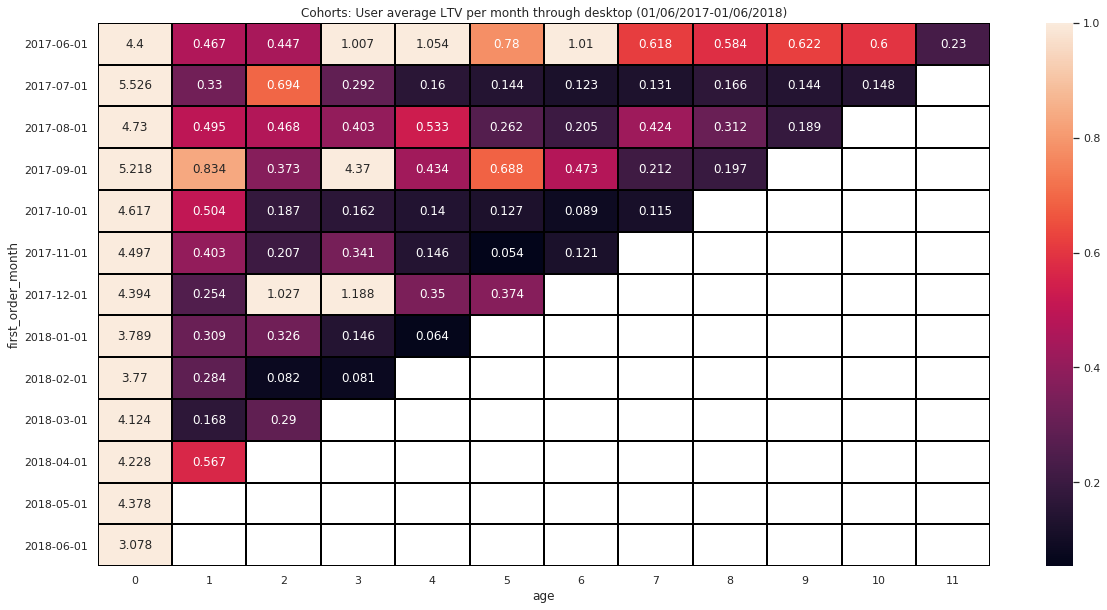

In [179]:
#визуализируем LTV rate через heatmap
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User average LTV per month through desktop (01/06/2017-01/06/2018)')
ax = sns.heatmap(output_desktop, annot=True, fmt='.4', linewidths=1, linecolor='black', vmax=1)
ax.set_yticklabels(cheques_grouped_by_cohorts.index.date)

In [180]:
#сделаем срез 6 месяцев по когортам, возьмем этот период как средний период жизни когорты и посчитаем LTV для когорт, 
#которые прожили этот промежуток
output_table_desktop = output_desktop.reset_index()

LTV_gr_6mnth_desktop = output_table.iloc[:6, 1:7]
LTV_gr_6mnth_desktop

age    0    1    2    3    4    5
0   4.25 0.44 0.39 0.86 0.92 0.66
1   5.41 0.30 0.56 0.32 0.16 0.14
2   4.75 0.42 0.41 0.35 0.45 0.26
3   5.08 1.01 0.47 3.58 0.36 0.58
4   4.50 0.48 0.17 0.14 0.14 0.11
5   4.64 0.36 0.18 0.29 0.13 0.05

In [181]:
LTV_gr_6mnth_desktop['LTV'] = LTV_gr_6mnth_desktop.sum(axis=1)
LTV_gr_6mnth_desktop

age    0    1    2    3    4    5   LTV
0   4.25 0.44 0.39 0.86 0.92 0.66  7.52
1   5.41 0.30 0.56 0.32 0.16 0.14  6.89
2   4.75 0.42 0.41 0.35 0.45 0.26  6.64
3   5.08 1.01 0.47 3.58 0.36 0.58 11.08
4   4.50 0.48 0.17 0.14 0.14 0.11  5.54
5   4.64 0.36 0.18 0.29 0.13 0.05  5.65

In [182]:
LTV_avg_6mnth_desktop = LTV_gr_6mnth_desktop['LTV'].mean()

"Усредненное значение LTV desktop за период 6 месяцев - {:.1f} у.е.".format (LTV_avg_6mnth_desktop)

'Усредненное значение LTV desktop за период 6 месяцев - 7.2 у.е.'

исходя из анализа хитмапа LTV устройства desktop мы видим, что если в первый месяц когорты LTV в диапазоне 3-5 у.е., то далее 
сумма значительно падает. Если брать 6 месяцев как средний срок жизни когорты, то 'Усредненное значение LTV desktop за период 6 месяцев - 7.2 у.е.'

In [183]:
#датафрейм заказов с touch
orders_through_touch = orders_with_source_and_device_with_cohorts[orders_with_source_and_device_with_cohorts['device'] == 'touch']
orders_through_touch

buy_ts  revenue                   uid    first_order_date  \
24    2017-06-01 17:33:00       11  16674220541096562302 2017-06-01 17:33:00   
25    2017-06-27 23:24:00     3.05  16674220541096562302 2017-06-01 17:33:00   
26    2017-06-01 18:07:00     9.17   3963367130094376110 2017-06-01 18:07:00   
27    2017-06-05 17:06:00      5.5   3963367130094376110 2017-06-01 18:07:00   
28    2017-06-07 12:54:00     6.11   3963367130094376110 2017-06-01 18:07:00   
...                   ...      ...                   ...                 ...   
50406 2018-04-27 13:44:00     2.44   5475859905133688694 2018-04-27 13:44:00   
50408 2018-04-27 22:46:00     2.44   9263703209363918894 2018-04-27 22:46:00   
50410 2018-04-29 11:38:00     1.47  11591255490975747929 2018-04-29 11:38:00   
50411 2018-04-29 13:47:00     1.95  13501255942829819557 2018-04-29 13:47:00   
50412 2018-04-29 14:46:00     1.22  16125244869962293766 2018-04-29 14:46:00   

      first_order_month order_month  source_id device  n_buyers  
24           2017-06-01  2017-06-01          1  touch       190  
25           2017-06-01  2017-06-01          1  touch       190  
26           2017-06-01  2017-06-01          1  touch       190  
27           2017-06-01  2017-06-01          1  touch       190  
28           2017-06-01  2017-06-01          1  touch       190  
...                 ...         ...        ...    ...       ...  
50406        2018-04-01  2018-04-01         10  touch       107  
50408        2018-04-01  2018-04-01         10  touch       107  
50410        2018-04-01  2018-04-01         10  touch       107  
50411        2018-04-01  2018-04-01         10  touch       107  
50412        2018-04-01  2018-04-01         10  touch       107  

[9488 rows x 9 columns]

In [184]:
#добавим столбец с количеством клиентов для каждой когорты и назовем его n_buyers
cohort_sizes_touch = orders_through_touch.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_touch.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes_touch.head())

  first_order_month  n_buyers
0        2017-06-01       321
1        2017-07-01       397
2        2017-08-01       256
3        2017-09-01       522
4        2017-10-01       808


In [185]:
#просуммируем выручку по месяцам
сohorts_orders_touch = orders_through_touch.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
сohorts_orders_touch.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  1236.12
1        2017-06-01  2017-07-01    99.39
2        2017-06-01  2017-08-01    40.64
3        2017-06-01  2017-09-01    26.21
4        2017-06-01  2017-10-01    75.71

In [186]:
# объединим выручку по месяцам с количеством новых покупателей

сohorts_orders_report_touch = pd.merge(cohort_sizes_touch, сohorts_orders_touch, on='first_order_month')
сohorts_orders_report_touch.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01       321  2017-06-01  1236.12
1        2017-06-01       321  2017-07-01    99.39
2        2017-06-01       321  2017-08-01    40.64
3        2017-06-01       321  2017-09-01    26.21
4        2017-06-01       321  2017-10-01    75.71

In [187]:
#зададим маржинальность 90% и рассчитаем валовую прибыль gp (исправлена опечататка)
сohorts_orders_report_touch['gp'] = сohorts_orders_report_touch['revenue'] * 0.9
сohorts_orders_report_touch.head()

first_order_month  n_buyers order_month  revenue      gp
0        2017-06-01       321  2017-06-01  1236.12 1112.51
1        2017-06-01       321  2017-07-01    99.39   89.45
2        2017-06-01       321  2017-08-01    40.64   36.58
3        2017-06-01       321  2017-09-01    26.21   23.59
4        2017-06-01       321  2017-10-01    75.71   68.14

In [188]:
#расчитаем периоды жизни когорты
сohorts_orders_report_touch['age'] = (сohorts_orders_report_touch['order_month'] - сohorts_orders_report_touch['first_order_month']) / np.timedelta64(1, 'M')
сohorts_orders_report_touch['age'] = сohorts_orders_report_touch['age'].round().astype('int')

In [189]:
#расчитаем ltv
сohorts_orders_report_touch['ltv'] = сohorts_orders_report_touch['gp'] / сohorts_orders_report_touch['n_buyers']
сohorts_orders_report_touch

first_order_month  n_buyers order_month  revenue      gp  age  ltv
0         2017-06-01       321  2017-06-01  1236.12 1112.51    0 3.47
1         2017-06-01       321  2017-07-01    99.39   89.45    1 0.28
2         2017-06-01       321  2017-08-01    40.64   36.58    2 0.11
3         2017-06-01       321  2017-09-01    26.21   23.59    3 0.07
4         2017-06-01       321  2017-10-01    75.71   68.14    4 0.21
..               ...       ...         ...      ...     ...  ...  ...
73        2018-03-01       756  2018-04-01   544.48  490.03    1 0.65
74        2018-03-01       756  2018-05-01   220.18  198.16    2 0.26
75        2018-04-01       429  2018-04-01  1923.97 1731.57    0 4.04
76        2018-04-01       429  2018-05-01       47    42.3    1 0.10
77        2018-05-01       639  2018-05-01  2500.12 2250.11    0 3.52

[78 rows x 7 columns]

In [190]:
output_touch = сohorts_orders_report_touch.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(3)
    
output_touch.fillna('')

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01        3.47 0.28 0.11 0.07 0.21 0.04 0.04 0.02 0.04 0.14 0.06 0.24
2017-07-01        4.96 0.19 0.05 0.44 0.16 0.13 0.05 0.12 0.07 0.09 0.11     
2017-08-01        4.83 0.12 0.17 0.13 0.06 0.23 0.12 0.10 0.05 0.08          
2017-09-01        4.54 1.68 0.85 0.46 0.07 0.17 1.26 0.24 0.04               
2017-10-01        4.00 0.39 0.11 0.05 0.12 0.03 0.02 0.05                    
2017-11-01        5.27 0.17 0.06 0.08 0.08 0.03 0.03                         
2017-12-01        3.75 0.15 0.06 0.05 0.01 0.03                              
2018-01-01        3.47 0.10 0.07 0.06 0.03                                   
2018-02-01        3.65 0.14 0.03 0.02                                        
2018-03-01        5.20 0.65 0.26                                             
2018-04-01        4.04 0.10                                                  
2018-05-01        3.52

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01')]

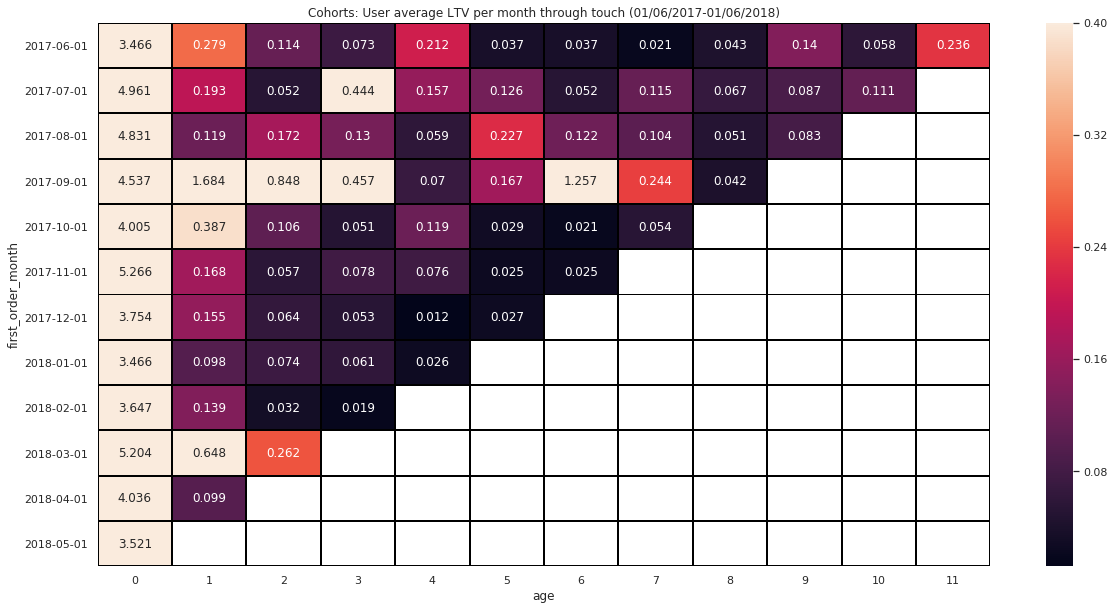

In [191]:
#визуализируем LTV rate через heatmap
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User average LTV per month through touch (01/06/2017-01/06/2018)')
ax = sns.heatmap(output_touch, annot=True, fmt='.4', linewidths=1, linecolor='black', vmax=0.4)
ax.set_yticklabels(cheques_grouped_by_cohorts.index.date)

In [192]:
#сделаем срез 6 месяцев по когортам, возьмем этот период как средний период жизни когорты и посчитаем LTV для когорт, 
#которые прожили этот промежуток
output_table_touch = output_touch.reset_index()

LTV_gr_6mnth_touch = output_table_touch.iloc[:6, 1:7]
LTV_gr_6mnth_touch

age    0    1    2    3    4    5
0   3.47 0.28 0.11 0.07 0.21 0.04
1   4.96 0.19 0.05 0.44 0.16 0.13
2   4.83 0.12 0.17 0.13 0.06 0.23
3   4.54 1.68 0.85 0.46 0.07 0.17
4   4.00 0.39 0.11 0.05 0.12 0.03
5   5.27 0.17 0.06 0.08 0.08 0.03

In [193]:
LTV_gr_6mnth_touch['LTV'] = LTV_gr_6mnth_touch.sum(axis=1)
LTV_gr_6mnth_touch

age    0    1    2    3    4    5  LTV
0   3.47 0.28 0.11 0.07 0.21 0.04 4.18
1   4.96 0.19 0.05 0.44 0.16 0.13 5.93
2   4.83 0.12 0.17 0.13 0.06 0.23 5.54
3   4.54 1.68 0.85 0.46 0.07 0.17 7.76
4   4.00 0.39 0.11 0.05 0.12 0.03 4.70
5   5.27 0.17 0.06 0.08 0.08 0.03 5.67

In [194]:
LTV_avg_6mnth_touch = LTV_gr_6mnth_touch['LTV'].mean()

"Усредненное значение LTV desktop за период 6 месяцев - {:.1f} у.е.".format (LTV_avg_6mnth_touch)

'Усредненное значение LTV desktop за период 6 месяцев - 5.6 у.е.'

исходя из анализа хитмапа LTV устройства touch мы видим, что если в первый месяц когорты LTV в диапазоне 3-5 у.е., то далее 
сумма значительно падает. Если брать 6 месяцев как средний срок жизни когорты, то 'Усредненное значение LTV desktop за период 6 месяцев - 5.6 у.е.'

Исходя из анализа LTV и доли устройства в заказах можно сказать следущее - доля desktop в заказах значительно выше, чем touch. (81.3% против 18,7%). Средний LTV по desktop  выше, чем touch и составляет 7.2 у.е. против 5.6 у.е. Соответственно на данном этапе целесообразно инвестрование в сайт desktop, нежели приложение в touch.

###  Вывод по задаче Маркетинг :

**Сколько денег потратили? Всего / на каждый источник / по времени** - 

'Общая сумма маркетинговых зарат составила - 329131.62 у.е.'

Затараты по источникам У.Е.:
	source_id	costs
- 	1	20833.27
- 	2	42806.04
- 	3	141321.63
- 	4	61073.60
- 	5	51757.10
- 	9	5517.49
- 	10	5822.49

Маркетиновые затраты по времени:

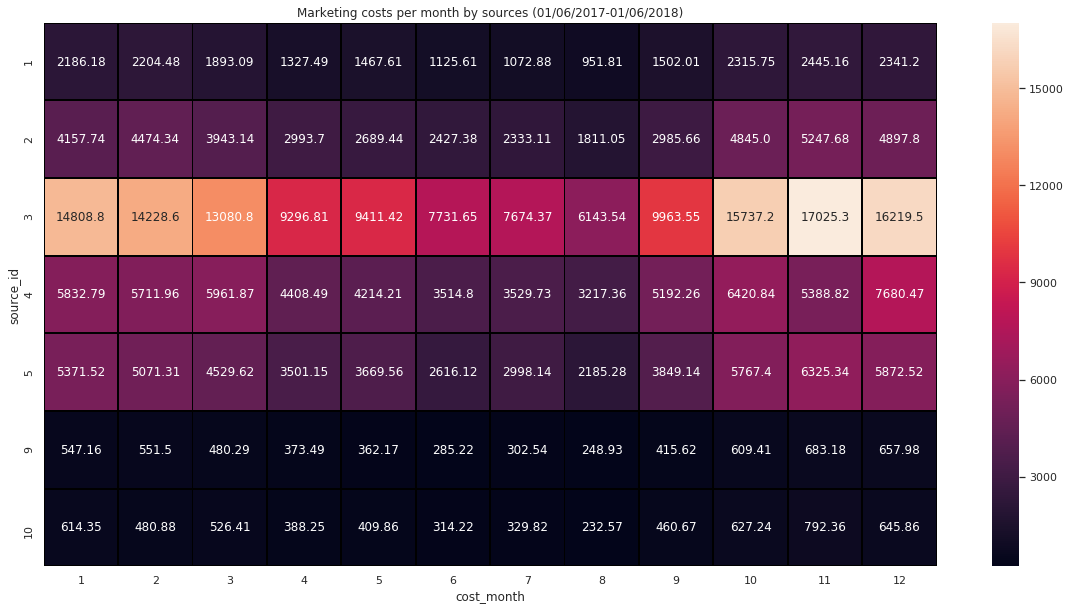

**Сколько стоило привлечение одного покупателя из каждого источника?** -


    source_id	cac	
- 	1 ->7.2	
- 	2 ->12.2	
- 	3 ->13.5	
- 	4 ->5.9	
- 	5 ->7.5	
- 	9 ->5.1	
- 	10->4.4	

**На сколько окупились расходы? (ROI) Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?**

	

Анализируя когорты на данных хитмапа можно сказать что есть когорты, которые окупаются быстро, например когорта сентября (за 4 месяца), но в среднем требуется порядка 11-12 месяцев для того, чтобы когорта окупилась.

На гистограмме видно, что только у источников №1,5,9 ltv выше сас что говорит нам о том, что клиент в среднем приносит нам больше денег, чем мы в него вложили, что хорошо.
На барчарте видно, что за уровень 1 (окупаемости) вошли лишь 3 источника - №1,5,9 - соответственно, можно  их рекомендовать как приносящие доход. Наиболее экономически эффективным можно считать источник №1 -romi 1.64 , далее №5 - romi - 1.2, далее №9 - romi 1.06.

## Шаг 3: Выводы и рекомендации:<a id="task_3"></a>

В качестве перспективных можно считать платформы № 1,5, в порядке следующего приоритета возможно рассмотрение источника №9.

Исходя из анализа LTV и доли устройства в заказах можно сказать следущее - доля desktop в заказах значительно выше, чем touch. (81.3% против 18,7%). Средний LTV по desktop  выше, чем touch и составляет 7.2 у.е. против 5.6 у.е. Соответственно на данном этапе целесообразно инвестрование в сайт desktop, нежели приложение в touch.


[<font size="2">(к содержанию)</font>](#beginning)<br/>

<hr style="border: 1px solid #000;"> 